In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime as dt
import matplotlib.pyplot as plt
import talib as ta

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
start = dt.datetime(2015, 10, 1)
end = dt.datetime(2016, 9, 30)
stock = data.DataReader('NOW', 'yahoo', start, end)

In [4]:
print(stock.shape)
print(stock.head())
print(stock.tail())

(253, 6)
                 Open       High        Low      Close   Volume  Adj Close
Date                                                                      
2015-10-01  69.139999  71.650002  67.650002  71.580002  1777400  71.580002
2015-10-02  70.349998  72.260002  69.900002  72.230003   924000  72.230003
2015-10-05  72.620003  76.529999  72.400002  76.470001  1826600  76.470001
2015-10-06  75.900002  76.910004  74.250000  74.580002  1272400  74.580002
2015-10-07  75.230003  75.269997  73.019997  74.970001  1845800  74.970001
                 Open       High        Low      Close   Volume  Adj Close
Date                                                                      
2016-09-26  77.129997  77.230003  76.410004  76.750000   907700  76.750000
2016-09-27  76.489998  79.190002  76.349998  79.040001  1504500  79.040001
2016-09-28  79.089996  80.309998  79.089996  79.769997  1890900  79.769997
2016-09-29  79.410004  80.099998  77.730003  78.480003  1028400  78.480003
2016-09-30  78.7

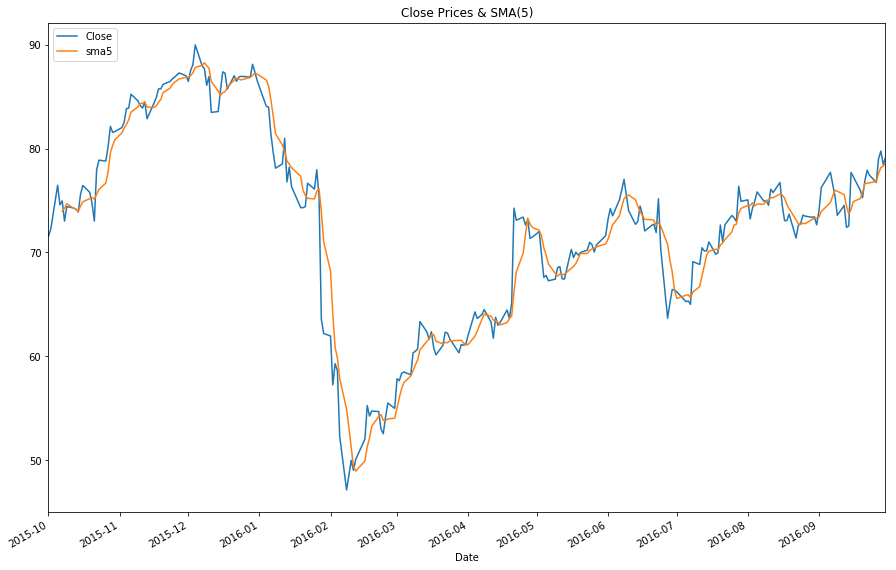

In [5]:
# SMA
stock['sma5'] = ta.SMA(stock['Close'].values, 5)

# TI Chart
stock.plot(y=['Close', 'sma5'])
plt.title('Close Prices & SMA(5)')
plt.legend(loc='upper left')
plt.show()

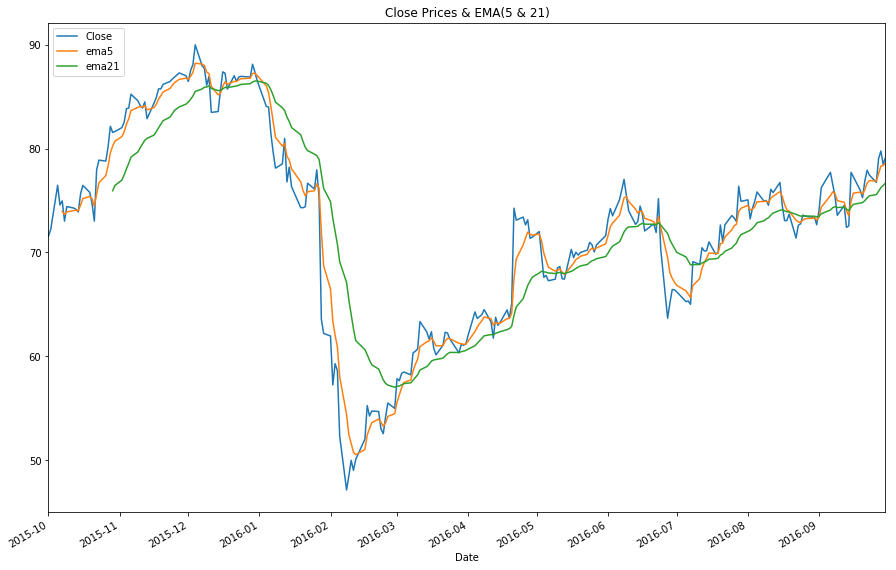

In [6]:
# EMA
stock['ema5'] = ta.EMA(stock['Close'].values, 5)
stock['ema21'] = ta.EMA(stock['Close'].values, 21)

# TI Chart
stock.plot(y=['Close', 'ema5', 'ema21'])
plt.title('Close Prices & EMA(5 & 21)')
plt.legend(loc='upper left')
plt.show()

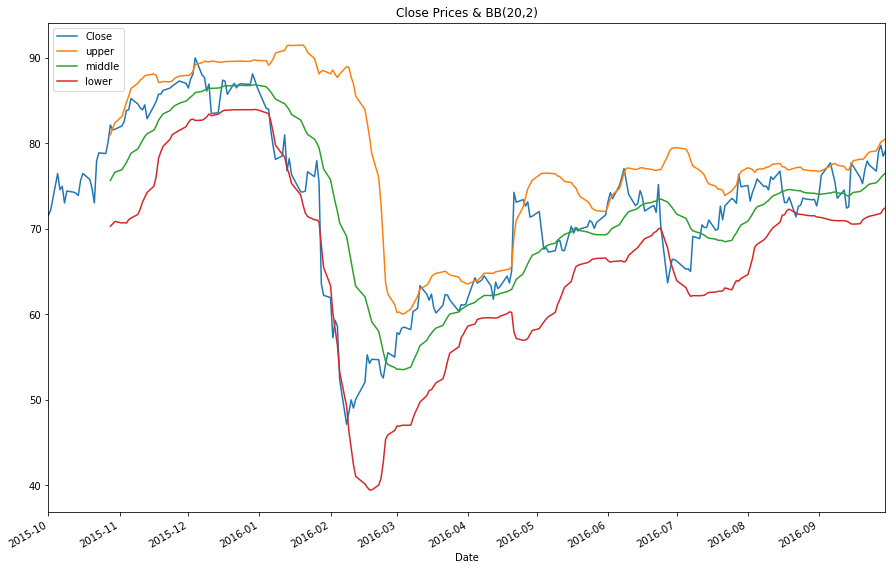

In [7]:
# BBANDS(20,2)
stock['upper'], stock['middle'], stock['lower'] = ta.BBANDS(stock['Close'].values,
                                                            timeperiod=20,
                                                            nbdevup=2,
                                                            nbdevdn=2,
                                                            matype=0)
# TI Chart
stock.plot(y=['Close', 'upper', 'middle', 'lower'])
plt.title('Close Prices & BB(20,2)')
plt.legend(loc='upper left')
plt.show()

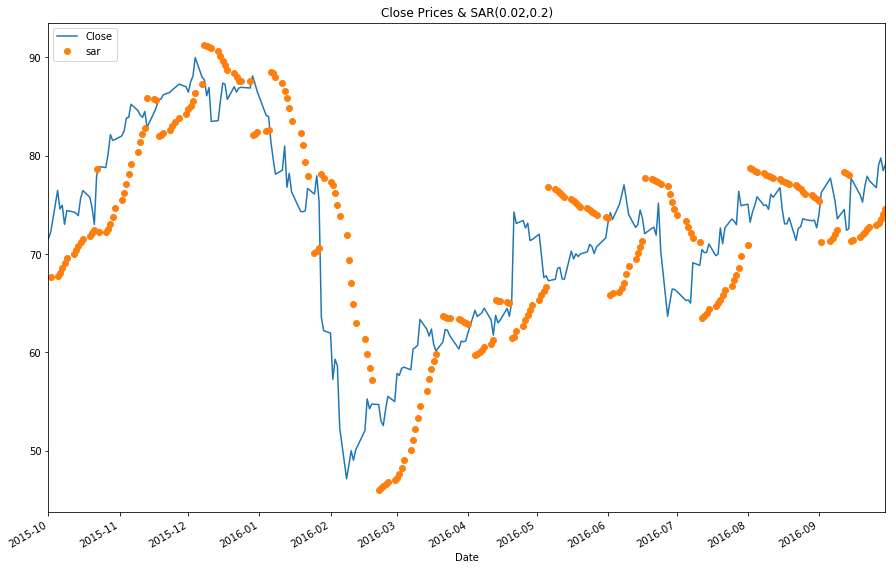

In [8]:
# Parabolic Stop and Reverse SAR(0.02,0.2) (Acceleration Factor Increment, Maximum Acceleration Factor)
stock['sar'] = ta.SAR(stock['High'].values, stock['Low'].values, acceleration=0.02, maximum=0.2)

# TI Chart
_, ax = plt.subplots()
stock.plot(y=['Close'], ax=ax)
stock.plot(y=['sar'], marker='o', linestyle='', ax=ax)
plt.title('Close Prices & SAR(0.02,0.2)')
plt.legend(loc='upper left')
plt.show()

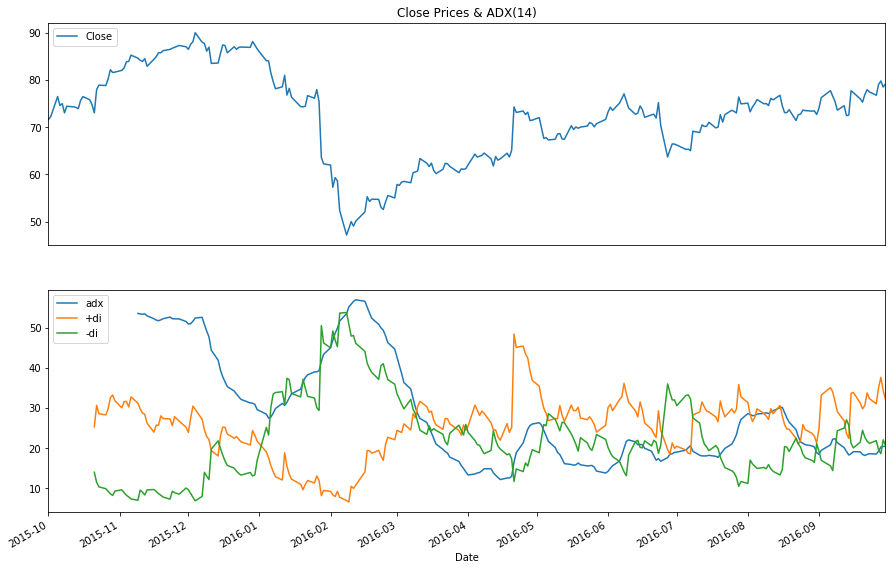

In [9]:
# Average Directional Moving Index, ADX(14)
stock['adx'] = ta.ADX(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)
stock['+di'] = ta.PLUS_DI(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)
stock['-di'] = ta.MINUS_DI(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)

# TI Chart
ax1 = plt.subplot(211)
plt.title('Close Prices & ADX(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(212)
stock.plot(y=['adx', '+di', '-di'], ax=ax2)
plt.legend(loc='upper left')
plt.show()


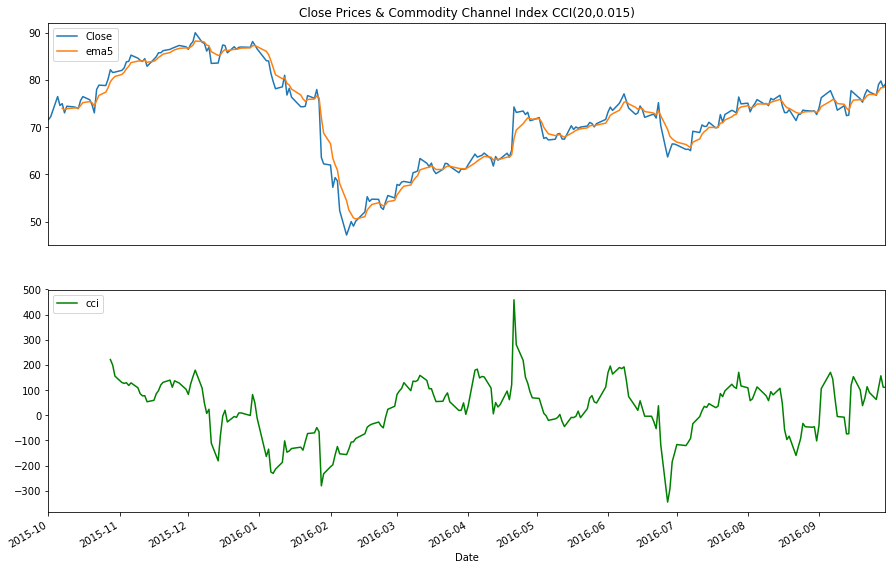

In [10]:
# Commodity Channel Index (20,0.015)
stock['cci'] = ta.CCI(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=20)

# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'ema5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

# +100 overbought below -100 oversold
# Warn of extreme conditions
# It is high when prices is too much above the average and too low when prices too below their average

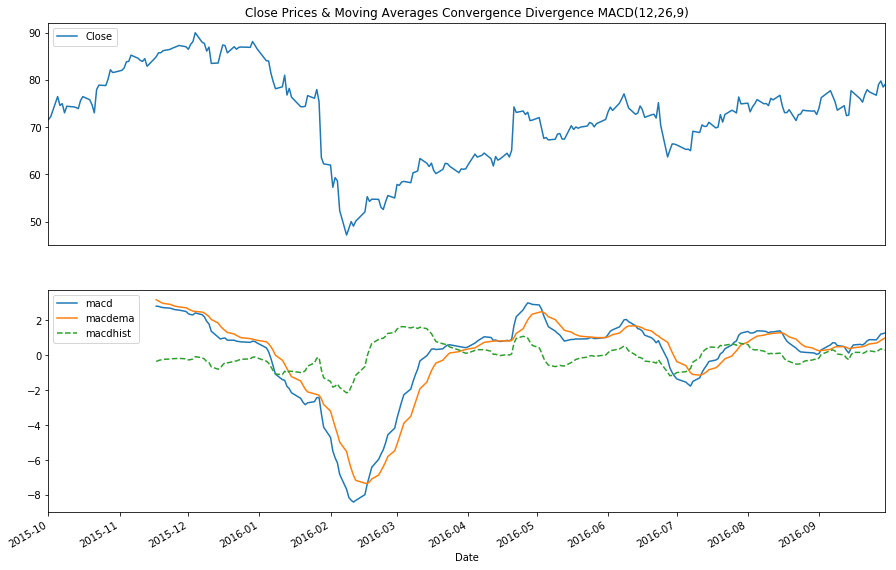

In [11]:
# MACD - Moving Averages Convergence Divergence(12,26,9)
stock['macd'], stock['macdema'], stock['macdhist'] = ta.MACD(stock['Close'].values,
                                                      fastperiod=12, slowperiod=26, signalperiod=9)
# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['macd', 'macdema'], ax=ax2)
stock.plot(y=['macdhist'], linestyle='--', ax=ax2)
plt.legend(loc='upper left')
plt.show()

# Strength of a trend by comparing two moving averages
# When the signal line cross overs the MCAD line it is a trading signal

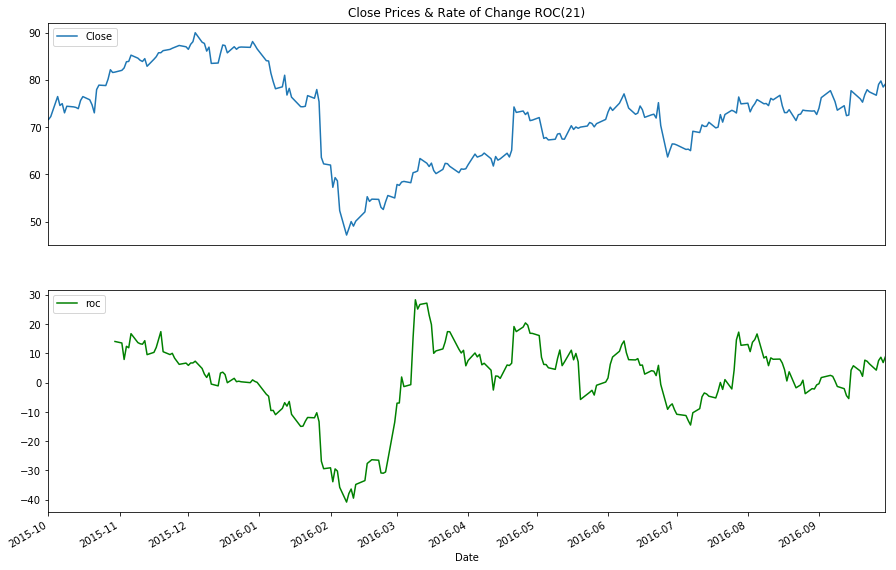

In [12]:
# Rate of Change - ROC(21)
stock['roc'] = ta.ROC(stock['Close'].values, timeperiod=21)

# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

# As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings.
# Prices are rising as long as the Rate-of-Change remains positive.
# Prices are falling when the Rate-of-Change is negative. 


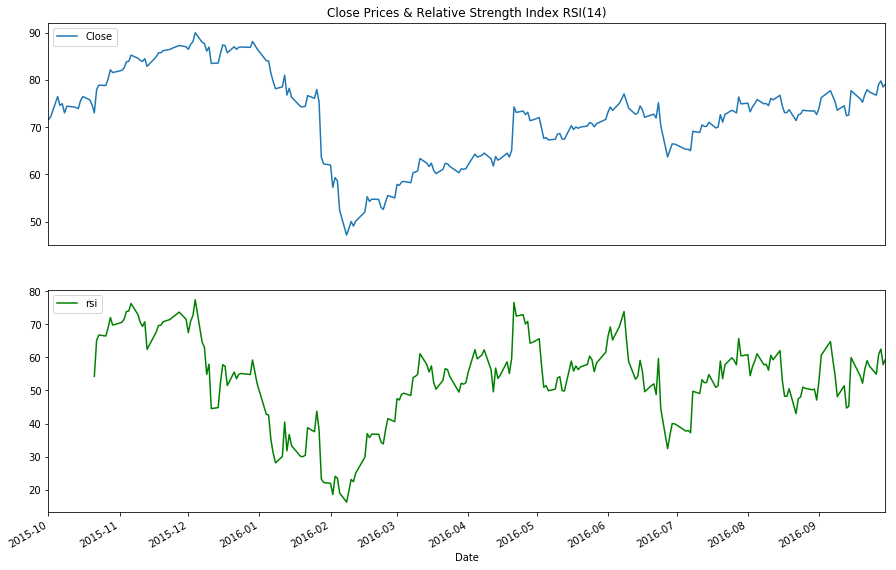

In [13]:
# Relative Strength Index = RSI(14)
stock['rsi'] = ta.RSI(stock['Close'].values, timeperiod=14)

# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

# A momentum oscillator that measures the speed and change of price movements. 
# Between 0 and 100
# Overbought when above 70 and oversold when below 30

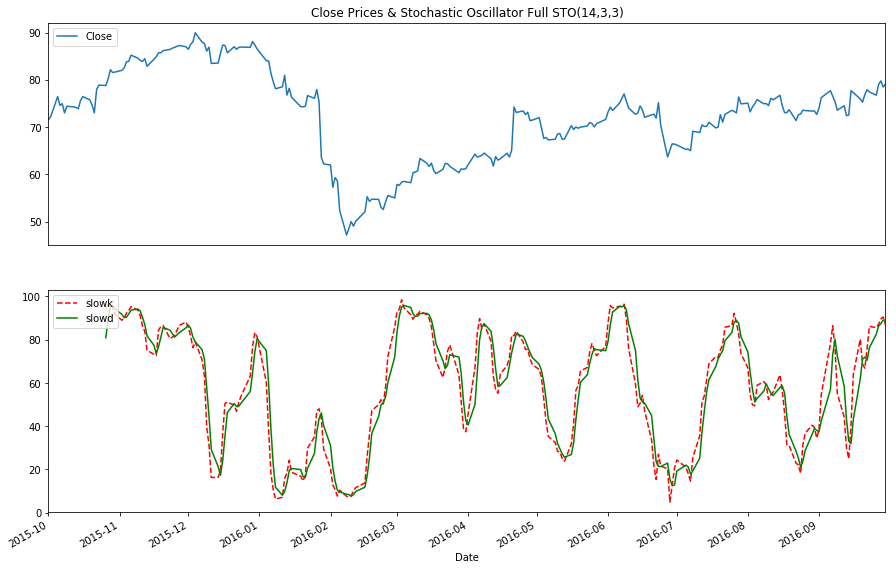

In [14]:
# Stochastic Oscillator Full - STO(14,3,3)
stock['slowk'], stock['slowd'] = ta.STOCH(stock['High'].values, stock['Low'].values, stock['Close'].values,
                                     fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
stock.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

# A momentum indicator
# Changes direction before the price

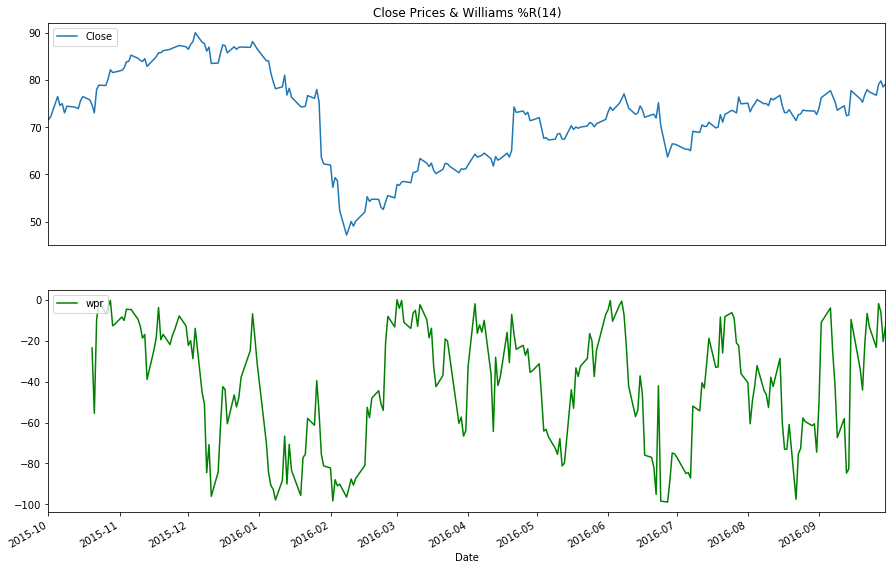

In [15]:
# Williams %R(14)
stock['wpr'] = ta.WILLR(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)

# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

# Inverse of fast stochastic oscillator
# Fast stochastic oscillator and Willaim %R is the same scaling is different

In [16]:
# Price Crossover Trading Signals

In [17]:
def PriceCrossoverWithoutTradingCommisions(outputColumn, inputColumn):
    stock[outputColumn] = ((stock['Close'] / stock['Close'].shift(1))-1)*stock[inputColumn]
    stock.ix[0, outputColumn] = 0

In [18]:
def PriceCrossoverWithTradingCommition(shiftedInputColumn, inputColumn, outputColumn, signalColumn, tempColumn):
    stock[shiftedInputColumn] = stock[inputColumn].shift(1)
    stock[tempColumn] = stock[signalColumn]
    sma5tc = 0
    for i, r in enumerate(stock.iterrows()):
        if (r[1][signalColumn] == 1 or r[1][signalColumn] == -1) and r[1][inputColumn] != r[1][shiftedInputColumn]:
            sma5tc = 0.01
        else:
            sma5tc = 0.00
        stock.ix[i, tempColumn] = sma5tc

    stock[outputColumn] = (((stock['Close']/stock['Close'].shift(1))-1)-stock[tempColumn])*stock[inputColumn]
    stock.ix[0, outputColumn] = 0

In [19]:
def CumulativeReturns(crt, crtc, bhcrt, drt, drtc, bhdrt, title):
    stock[crt] = np.cumprod(stock[drt]+1)-1
    stock[crtc] = np.cumprod(stock[drtc]+1)-1
    stock[bhcrt] = np.cumprod(stock[bhdrt]+1)-1

    stock.plot(y=[crt, crtc, bhcrt])
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

In [20]:
def StrategiesPerformanceMetrics(crt, crtc, bhcrt, drt, drtc, bhdrt, colTitle1, colTitle2, colTitle3):
    # Annualized Returns
    sma5yrt = stock.ix[-1, crt]
    sma5yrtc = stock.ix[-1, crtc]
    bhyrt = stock.ix[-1, bhcrt]

    # Annualized Standard Deviation
    sma5std = np.std(stock[drt])*np.sqrt(252)
    sma5stdc = np.std(stock[drtc])*np.sqrt(252)
    bhstd = np.std(stock[bhdrt])*np.sqrt(252)

    # Annualized Sharpe Ratio
    sma5sr = sma5yrt / sma5std
    sma5src = sma5yrtc / sma5stdc
    bhsr = bhyrt / bhstd

    # Summary Results Data Table
    data = [{'0': '', '1': colTitle1, '2': colTitle2, '3': colTitle3},
            {'0': 'Annualized Return', '1': sma5yrt, '2': sma5yrtc, '3': bhyrt},
            {'0': 'Annualized Standard Deviation', '1': sma5std, '2': sma5stdc, '3': bhstd},
            {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': sma5sr, '2': sma5src, '3': bhsr}]
    
    table = pd.DataFrame(data)
    print(table)

In [67]:
def GenerateTradingStrategy(strategyColumn, signalColumn): # Own stock=1 , not own stock=0, no short-selling
    stock[strategyColumn] = 1
    sma5str = 0
    for i, r in enumerate(stock.iterrows()):
        if r[1][signalColumn] == 1:
            sma5str = 1
        elif r[1][signalColumn] == -1:
            sma5str = 0
        else:
            sma5str = stock[strategyColumn][i-1]
        stock.ix[i, strategyColumn] = sma5str

def TradingStrategyChart1(title, referenceColumns):
    ax1 = plt.subplot(2, 1, 1)
    plt.title(title)
    plt.gca().axes.get_xaxis().set_visible(False)
    stock.plot(y=referenceColumns, ax=ax1)
    plt.legend(loc='upper left')
    ax2 = plt.subplot(2, 1, 2)
    stock.plot(y=[strategyColumn], marker='o', linestyle='', ax=ax2)
    plt.legend(loc='upper left')
    plt.show()
    
def TradingStrategyChart3(title, col1, col2, col3):
    ax1 = plt.subplot(3, 1, 1)
    plt.title(title)
    plt.gca().axes.get_xaxis().set_visible(False)
    stock.plot(y=[col1], ax=ax1)
    plt.legend(loc='upper left')
    ax2 = plt.subplot(3, 1, 2)
    stock.plot(y=[col2], color='g', ax=ax2)
    plt.legend(loc='upper left')
    plt.gca().axes.get_xaxis().set_visible(False)
    ax3 = plt.subplot(3, 1, 3)
    stock.plot(y=[col3], marker='o', linestyle='', ax=ax3)
    plt.legend(loc='upper left')
    plt.show()


In [22]:
stock['Close(-1)'] = stock['Close'].shift(1)
stock['Close(-2)'] = stock['Close'].shift(2)

In [23]:
# Buy and Hold

# Daily Return
stock['bhdrt'] = (stock['Close']/stock['Close(-1)'])-1
stock.ix[0, 'bhdrt'] = 0

# Cumulative Daily Return
stock['bhcrt'] = np.cumprod(stock['bhdrt']+1)-1

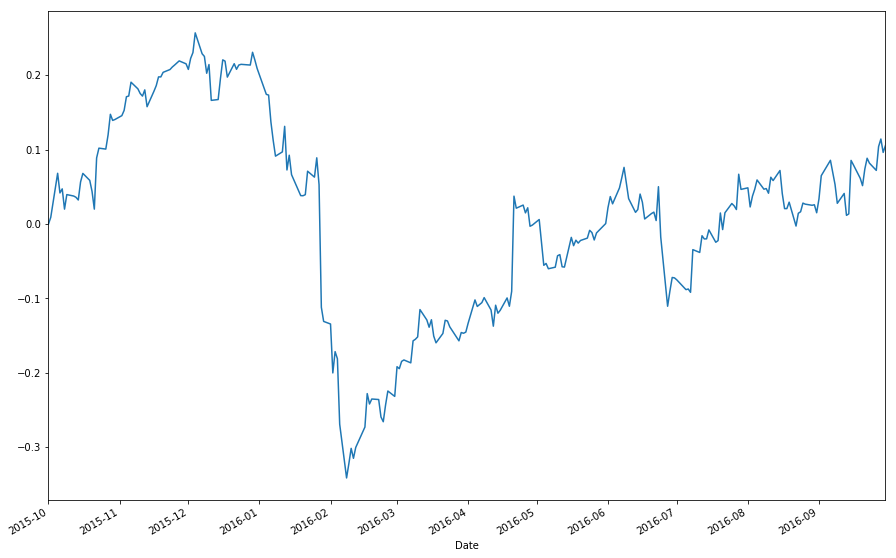

In [24]:
stock['bhcrt'].plot()

In [25]:
# Previous Periods Data (avoid backtesting bias)
stock['sma5(-1)'] = stock['sma5'].shift(1)
stock['sma5(-2)'] = stock['sma5'].shift(2)

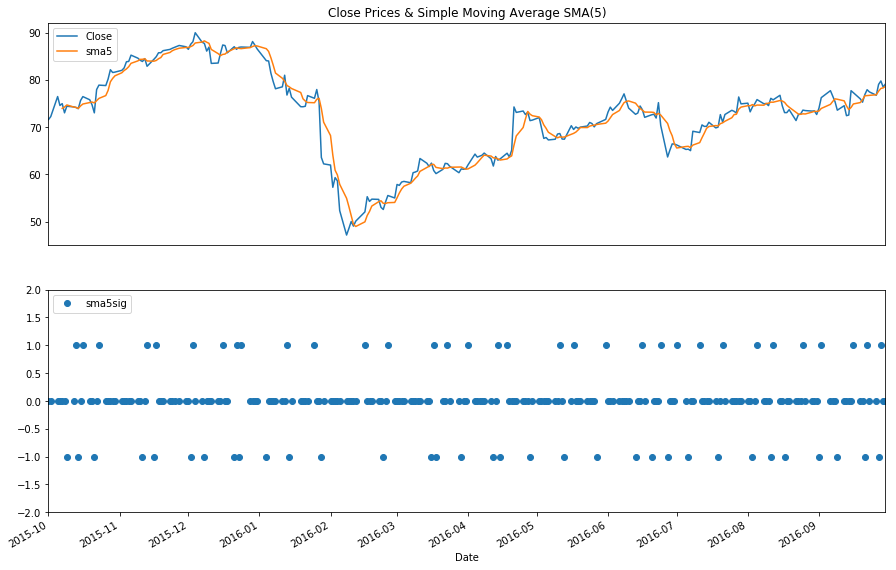

In [26]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
stock['sma5sig'] = 0
sma5sig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)']:
        sma5sig = 1.0
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)']:
        sma5sig = -1.0
    else:
        sma5sig = 0.0
    stock.ix[i, 'sma5sig'] = sma5sig
    
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Simple Moving Average SMA(5)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['sma5sig'], marker='o', linestyle='', ax=ax2)
axes = plt.gca()
axes.set_ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

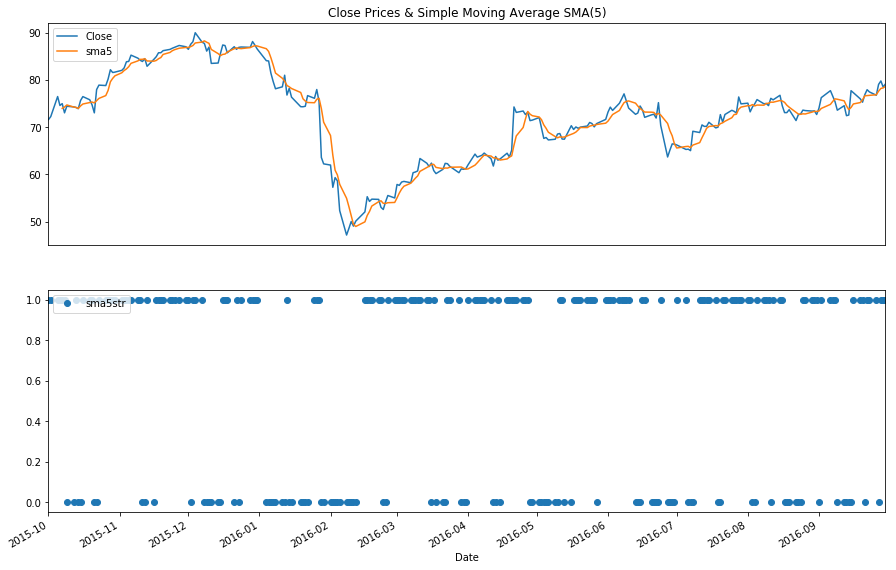

In [35]:
GenerateTradingStrategy('sma5str', 'sma5sig', 'Close Prices & Simple Moving Average SMA(5)', ['Close', 'sma5'])


In [28]:
PriceCrossoverWithoutTradingCommisions('sma5drt', 'sma5str')
PriceCrossoverWithTradingCommition('sma5str(-1)', 'sma5str', 'sma5drtc', 'sma5sig', 'sma5tc')

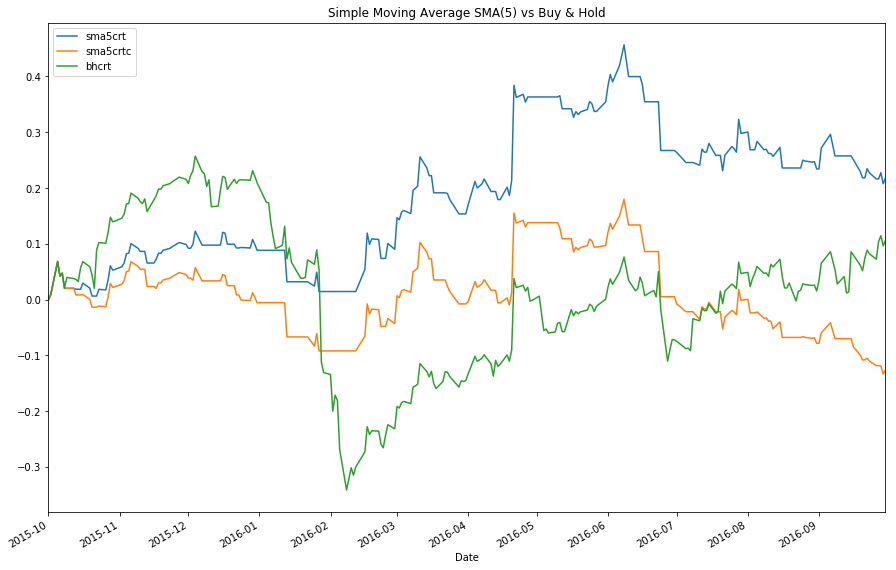

In [29]:
CumulativeReturns('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'Simple Moving Average SMA(5) vs Buy & Hold')


In [30]:
StrategiesPerformanceMetrics('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'SMA(5)', 'SMA(5)TC', 'B&H')


                                 0         1         2         3
0                                     SMA(5)  SMA(5)TC       B&H
1                Annualized Return   0.21785 -0.126081  0.105756
2    Annualized Standard Deviation  0.264934  0.271558  0.423325
3  Annualized Sharpe Ratio (Rf=0%)  0.822282 -0.464287  0.249822


In [31]:
# Previous Periods Data (avoid back-testing bias)
stock['ema5(-1)'] = stock['ema5'].shift(1)
stock['ema21(-1)'] = stock['ema21'].shift(1)
stock['ema5(-2)'] = stock['ema5'].shift(2)
stock['ema21(-2)'] = stock['ema21'].shift(2)

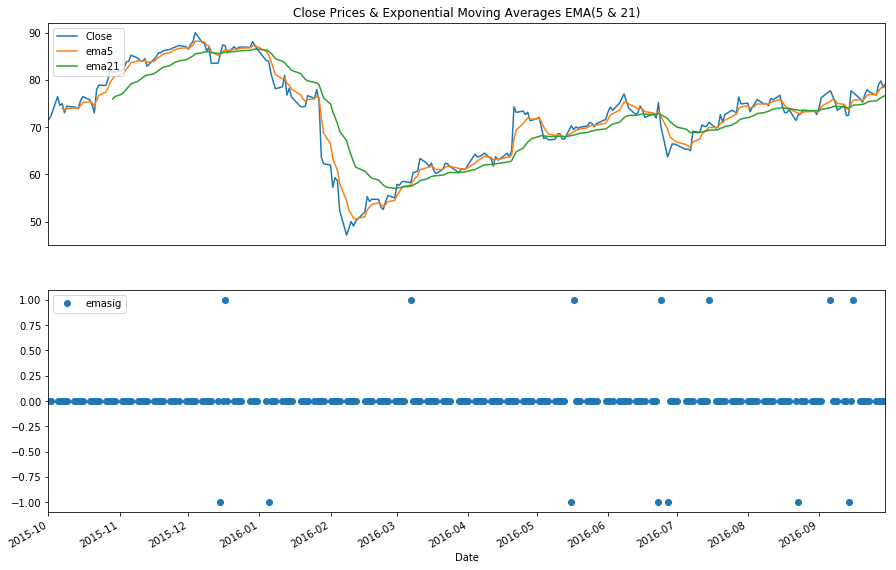

In [32]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
stock['emasig'] = 0
emasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['ema5(-2)'] < r[1]['ema21(-2)'] and r[1]['ema5(-1)'] > r[1]['ema21(-1)']:
        emasig = 1
    elif r[1]['ema5(-2)'] > r[1]['ema21(-2)'] and r[1]['ema5(-1)'] < r[1]['ema21(-1)']:
        emasig = -1
    else:
        emasig = 0
    stock.ix[i, 'emasig'] = emasig

# Trading Signals Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'ema5', 'ema21'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['emasig'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

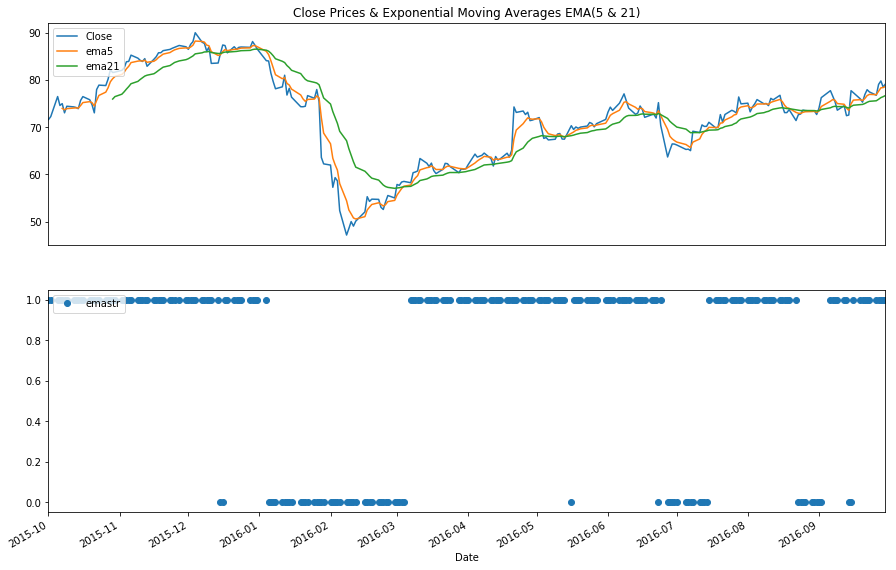

In [36]:
GenerateTradingStrategy('emastr', 'emasig', 'Close Prices & Exponential Moving Averages EMA(5 & 21)', ['Close', 'ema5', 'ema21'])


In [37]:
PriceCrossoverWithoutTradingCommisions('emadrt', 'emastr')
PriceCrossoverWithTradingCommition('emastr(-1)', 'emastr', 'emadrtc', 'emasig', 'ematc')

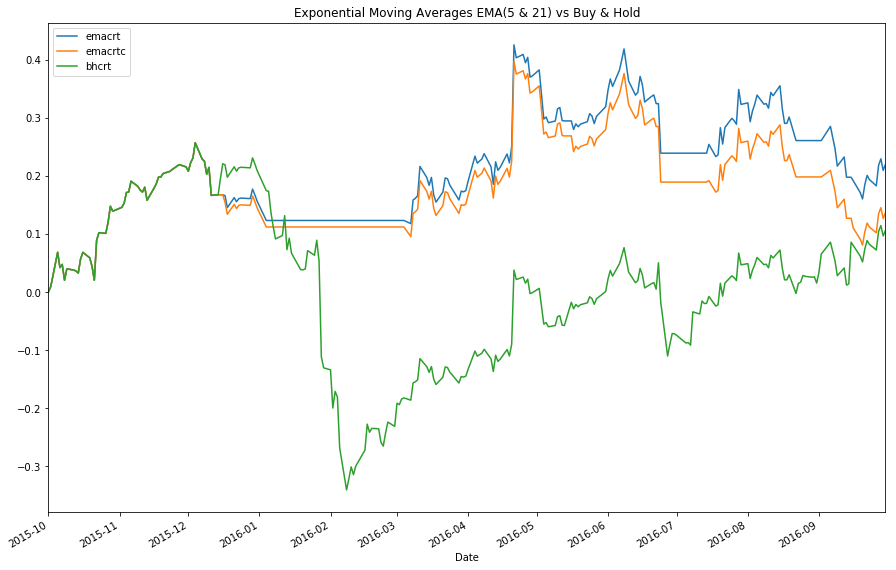

In [38]:
CumulativeReturns('emacrt', 'emacrtc', 'bhcrt', 'emadrt', 'emadrtc', 'bhdrt', 'Exponential Moving Averages EMA(5 & 21) vs Buy & Hold')


In [39]:
StrategiesPerformanceMetrics('emacrt', 'emacrtc', 'bhcrt', 'emadrt', 'emadrtc', 'bhdrt', 'EMA(5 & 21)', 'EMA(5 & 21)TC', 'B&H')


                                 0            1              2         3
0                                   EMA(5 & 21)  EMA(5 & 21)TC       B&H
1                Annualized Return     0.219916       0.136341  0.105756
2    Annualized Standard Deviation     0.275488        0.27895  0.423325
3  Annualized Sharpe Ratio (Rf=0%)     0.798276       0.488766  0.249822


In [ ]:
# Bollinger Bands Crossover Trading Signals

In [40]:
stock['lower(-1)'] = stock['lower'].shift(1)
stock['upper(-1)'] = stock['upper'].shift(1)
stock['lower(-2)'] = stock['lower'].shift(2)
stock['upper(-2)'] = stock['upper'].shift(2)

In [41]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['bbsig'] = 0
bbsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        bbsig = 1
    elif r[1]['Close(-2)'] < r[1]['upper(-2)'] and r[1]['Close(-1)'] > r[1]['upper(-1)']:
        bbsig = -1
    else:
        bbsig = 0
    stock.ix[i, 'bbsig'] = bbsig

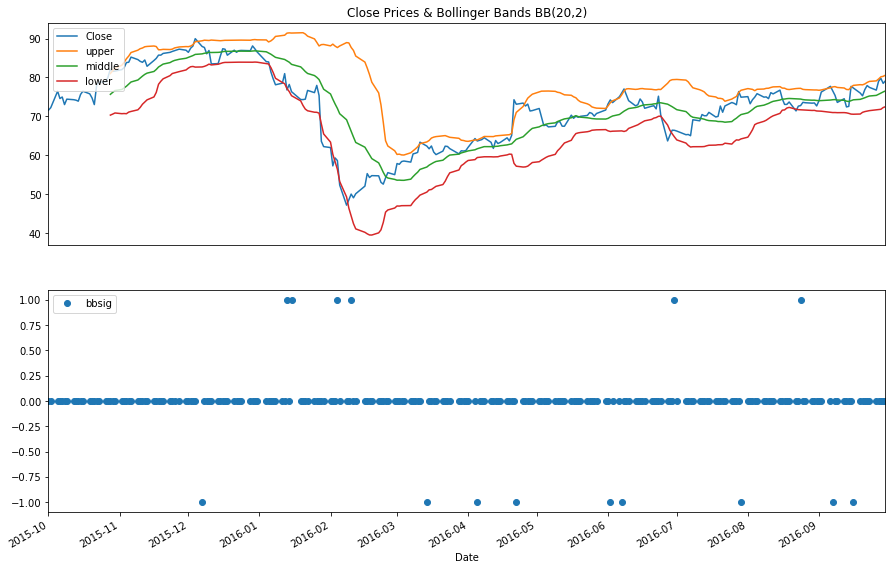

In [42]:
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Bollinger Bands BB(20,2)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'upper', 'middle', 'lower'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['bbsig'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

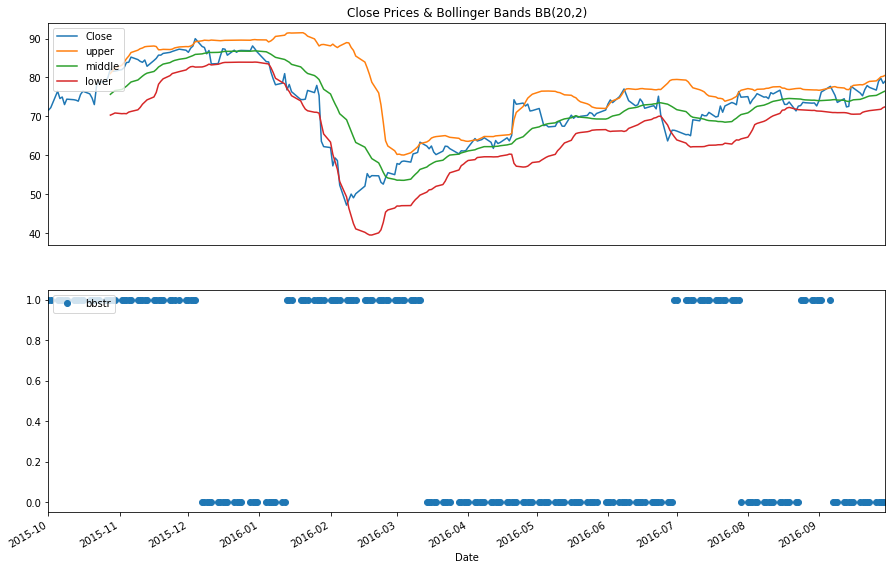

In [43]:
GenerateTradingStrategy('bbstr', 'bbsig', 'Close Prices & Bollinger Bands BB(20,2)', ['Close', 'upper', 'middle', 'lower'])


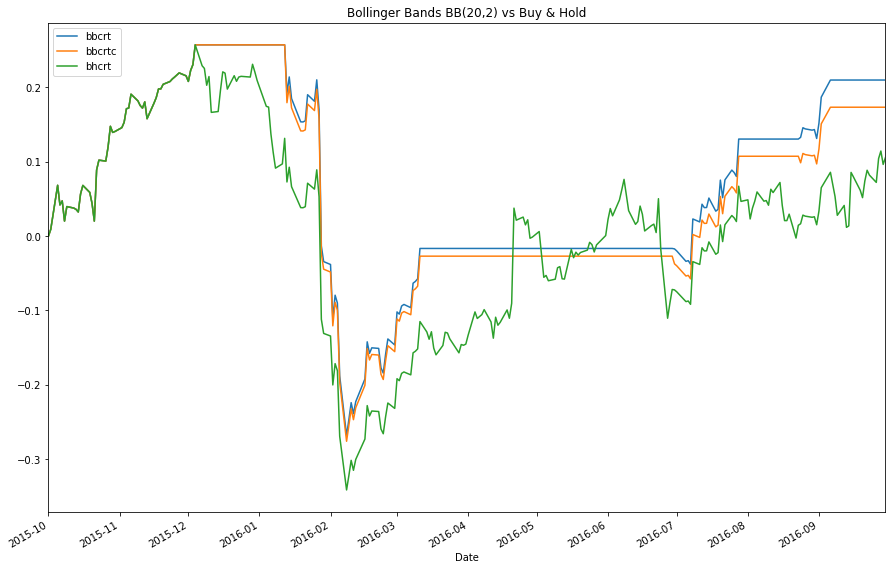

In [45]:
PriceCrossoverWithoutTradingCommisions('bbdrt', 'bbstr')
PriceCrossoverWithTradingCommition('bbstr(-1)', 'bbstr', 'bbdrtc', 'bbsig', 'bbtc')
CumulativeReturns('bbcrt', 'bbcrtc', 'bhcrt', 'bbdrt', 'bbdrtc', 'bhdrt', 'Bollinger Bands BB(20,2) vs Buy & Hold')

In [46]:
StrategiesPerformanceMetrics('bbcrt', 'bbcrtc', 'bhcrt', 'bbdrt', 'bbdrtc', 'bhdrt', 'BB(20,2)', 'BB(20,2)TC', 'B&H')

                                 0         1           2         3
0                                   BB(20,2)  BB(20,2)TC       B&H
1                Annualized Return  0.209886    0.173319  0.105756
2    Annualized Standard Deviation  0.321912    0.324013  0.423325
3  Annualized Sharpe Ratio (Rf=0%)  0.651996    0.534915  0.249822


In [ ]:
# SAR Trading Signals

In [47]:
# Previous Periods Data (avoid backtesting bias)
stock['sar(-1)'] = stock['sar'].shift(1)
stock['sar(-2)'] = stock['sar'].shift(2)

In [49]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['sarsig'] = 0
sarsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sar(-2)'] and r[1]['Close(-1)'] > r[1]['sar(-1)']:
        sarsig = 1
    elif r[1]['Close(-2)'] > r[1]['sar(-2)'] and r[1]['Close(-1)'] < r[1]['sar(-1)']:
        sarsig = -1
    else:
        sarsig = 0
    stock.ix[i, 'sarsig'] = sarsig

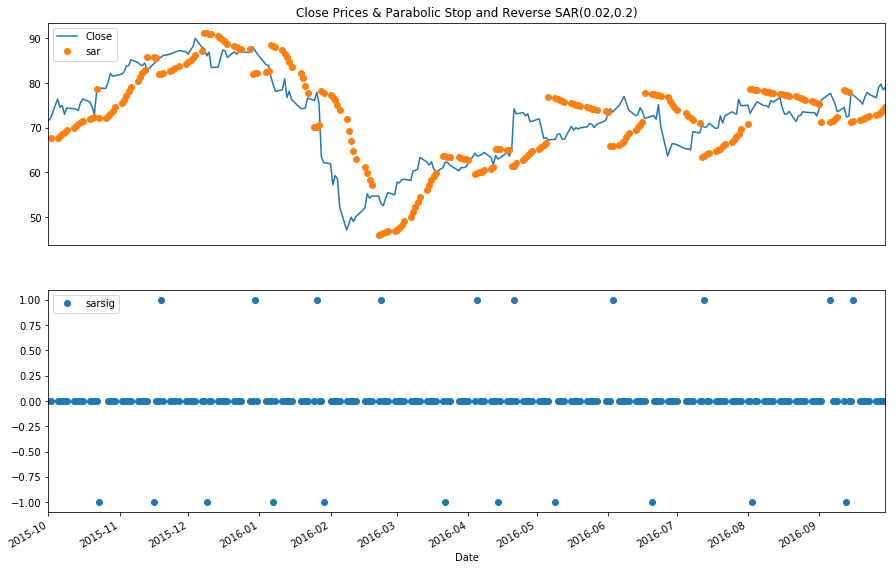

In [50]:
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
stock.plot(y=['sar'], marker='o', linestyle='', ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['sarsig'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

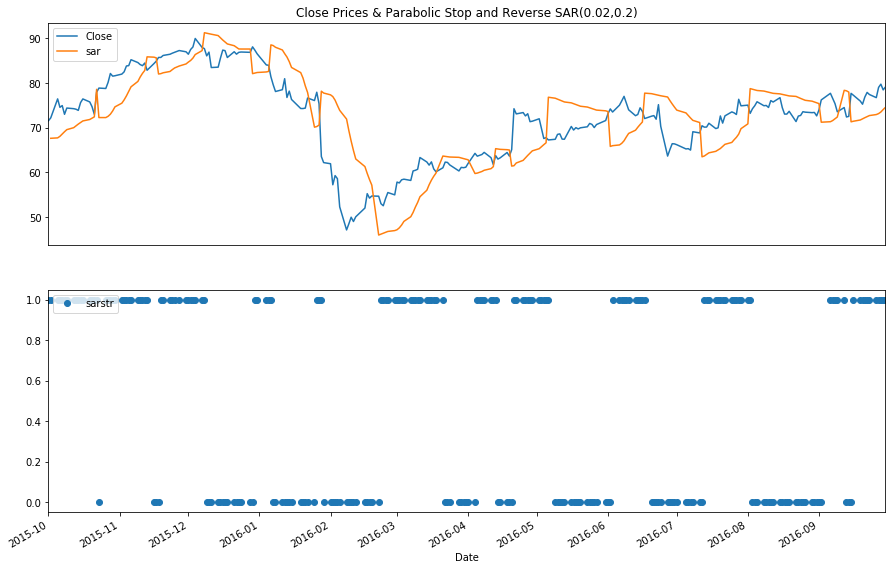

In [51]:
GenerateTradingStrategy('sarstr', 'sarsig', 'Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)', ['Close', 'sar'])


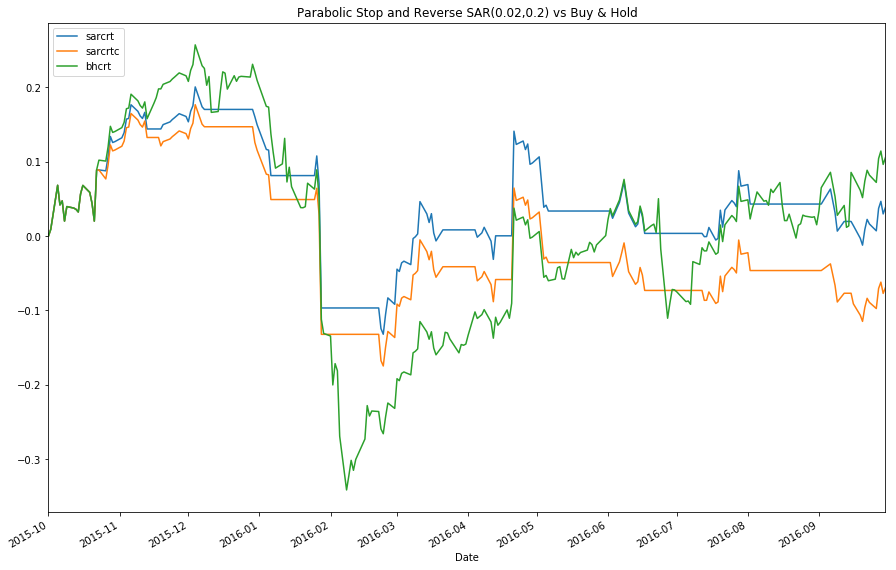

In [53]:
PriceCrossoverWithoutTradingCommisions('sardrt', 'sarstr')
PriceCrossoverWithTradingCommition('sarstr(-1)', 'sarstr', 'sardrtc', 'sarsig', 'sartc')
CumulativeReturns('sarcrt', 'sarcrtc', 'bhcrt', 'sardrt', 'sardrtc', 'bhdrt', 'Parabolic Stop and Reverse SAR(0.02,0.2) vs Buy & Hold')


In [54]:
StrategiesPerformanceMetrics('sarcrt', 'sarcrtc', 'bhcrt', 'sardrt', 'sardrtc', 'bhdrt', 'SAR(0.02,0.2)', 'SAR(0.02,0.2)TC', 'B&H')


                                 0              1                2         3
0                                   SAR(0.02,0.2)  SAR(0.02,0.2)TC       B&H
1                Annualized Return      0.0385828        -0.069219  0.105756
2    Annualized Standard Deviation       0.301482         0.299527  0.423325
3  Annualized Sharpe Ratio (Rf=0%)       0.127977        -0.231094  0.249822


In [ ]:
# Average Directional Movement Trade Signals

In [55]:
# Previous Periods Data (avoid back-testing bias)
stock['adx(-1)'] = stock['adx'].shift(1)
stock['+di(-1)'] = stock['+di'].shift(1)
stock['-di(-1)'] = stock['-di'].shift(1)
stock['+di(-2)'] = stock['+di'].shift(2)
stock['-di(-2)'] = stock['-di'].shift(2)

In [56]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
stock['adxsig'] = 0
adxsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['+di(-2)'] < r[1]['-di(-2)'] and r[1]['+di(-1)'] > r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = 1
    elif r[1]['+di(-2)'] > r[1]['-di(-2)'] and r[1]['+di(-1)'] < r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = -1
    else:
        adxsig = 0
    stock.ix[i, 'adxsig'] = adxsig
    

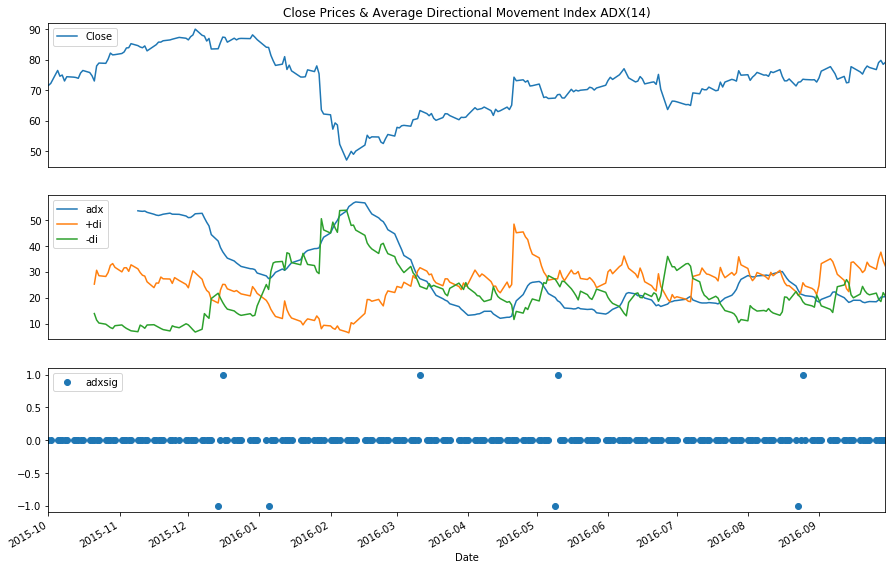

In [57]:
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Average Directional Movement Index ADX(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['adx', '+di', '-di'], ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['adxsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

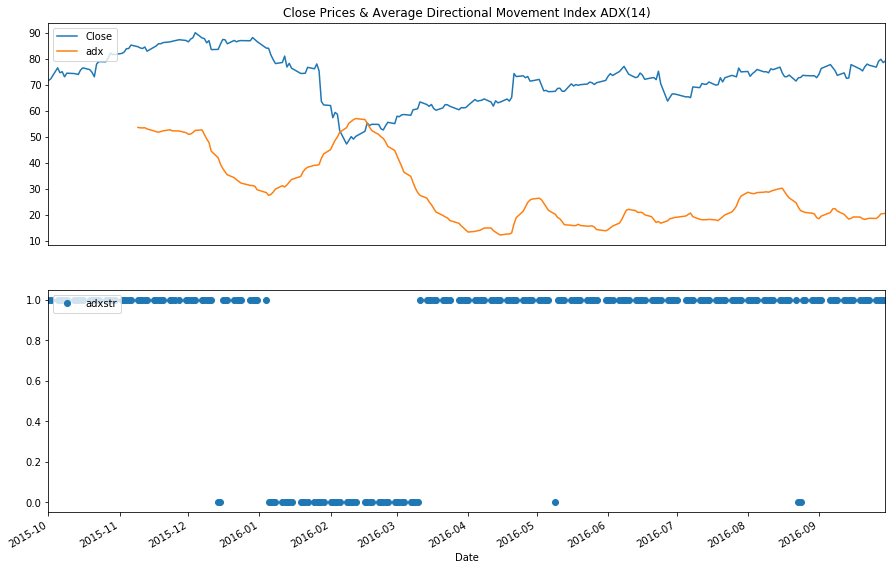

In [58]:
GenerateTradingStrategy('adxstr', 'adxsig', 'Close Prices & Average Directional Movement Index ADX(14)', ['Close', 'adx'])



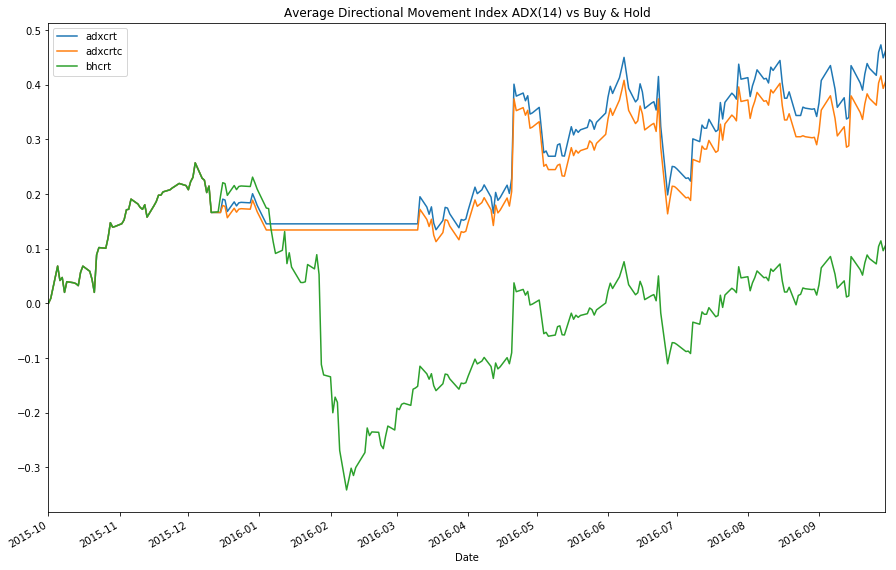

In [59]:
PriceCrossoverWithoutTradingCommisions('adxdrt', 'adxstr')
PriceCrossoverWithTradingCommition('adxstr(-1)', 'adxstr', 'adxdrtc', 'adxsig', 'adxtc')
CumulativeReturns('adxcrt', 'adxcrtc', 'bhcrt', 'adxdrt', 'adxdrtc', 'bhdrt', 'Average Directional Movement Index ADX(14) vs Buy & Hold')



In [60]:
StrategiesPerformanceMetrics('adxcrt', 'adxcrtc', 'bhcrt', 'adxdrt', 'adxdrtc', 'bhdrt', 'ADX(14)', 'ADX(14)TC', 'B&H')

                                 0         1          2         3
0                                    ADX(14)  ADX(14)TC       B&H
1                Annualized Return  0.461662   0.405334  0.105756
2    Annualized Standard Deviation  0.315367   0.313292  0.423325
3  Annualized Sharpe Ratio (Rf=0%)   1.46389    1.29379  0.249822


In [ ]:
# Bands Crossover TS

In [61]:
# Previous Periods Data (avoid back-testing bias)
stock['cci(-1)'] = stock['cci'].shift(1)
stock['cci(-2)'] = stock['cci'].shift(2)

In [62]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['ccisig'] = 0
ccisig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['cci(-2)'] < -100 and r[1]['cci(-1)'] > -100:
        ccisig = 1
    elif r[1]['cci(-2)'] < 100 and r[1]['cci(-1)'] > 100:
        ccisig = -1
    else:
        ccisig = 0
    stock.ix[i, 'ccisig'] = ccisig

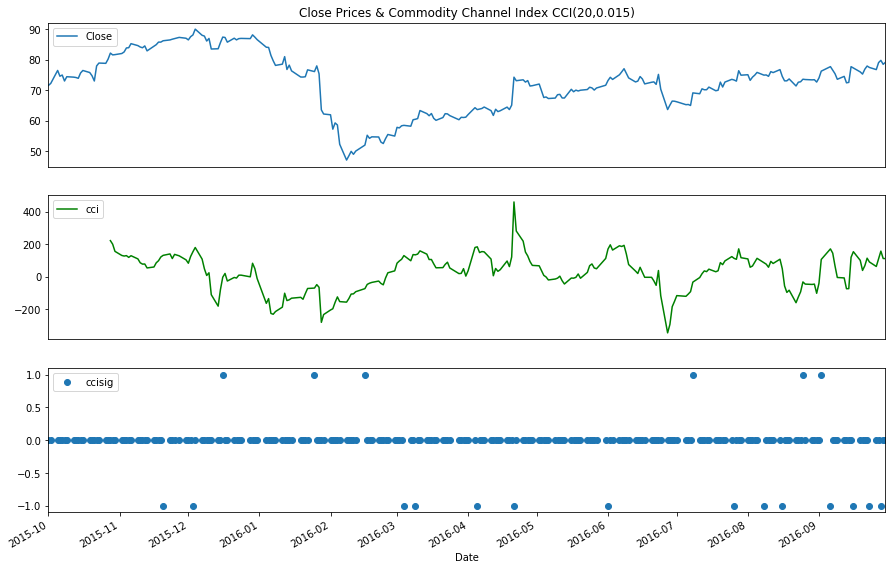

In [63]:
# Trading Signals Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['ccisig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

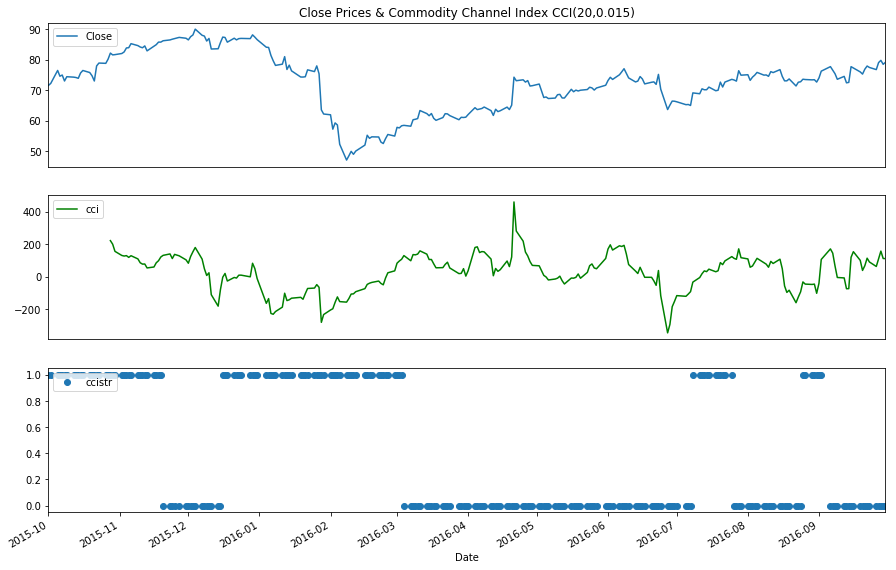

In [68]:
GenerateTradingStrategy('ccistr', 'ccisig')
TradingStrategyChart3('Close Prices & Commodity Channel Index CCI(20,0.015)', 'Close', 'cci', 'ccistr')


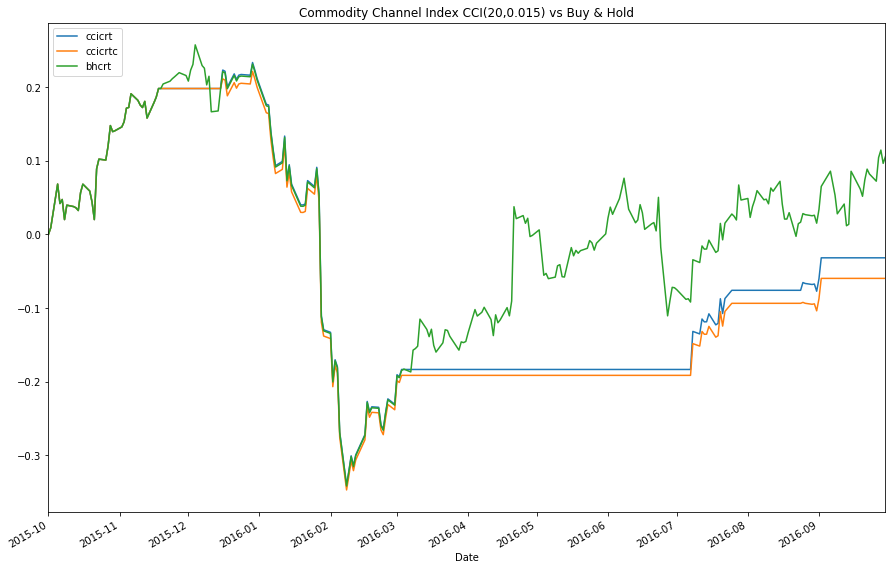

In [69]:
PriceCrossoverWithoutTradingCommisions('ccidrt', 'ccistr')
PriceCrossoverWithTradingCommition('ccistr(-1)', 'ccistr', 'ccidrtc', 'ccisig', 'ccitc')
CumulativeReturns('ccicrt', 'ccicrtc', 'bhcrt', 'ccidrt', 'ccidrtc', 'bhdrt', 'Commodity Channel Index CCI(20,0.015) vs Buy & Hold')


In [70]:
StrategiesPerformanceMetrics('ccicrt', 'ccicrtc', 'bhcrt', 'ccidrt', 'ccidrtc', 'bhdrt', 'CCI(20,0.015)', 'CCI(20,0.015)TC', 'B&H')


                                 0              1                2         3
0                                   CCI(20,0.015)  CCI(20,0.015)TC       B&H
1                Annualized Return     -0.0317756        -0.059667  0.105756
2    Annualized Standard Deviation       0.319443         0.316924  0.423325
3  Annualized Sharpe Ratio (Rf=0%)     -0.0994722        -0.188269  0.249822


In [71]:
# MACD

In [72]:
stock['macd(-1)'] = stock['macd'].shift(1)
stock['macdema(-1)'] = stock['macdema'].shift(1)
stock['macd(-2)'] = stock['macd'].shift(2)
stock['macdema(-2)'] = stock['macdema'].shift(2)

In [73]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['macdsig'] = 0
macdsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)'] < r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    stock.ix[i, 'macdsig'] = macdsig

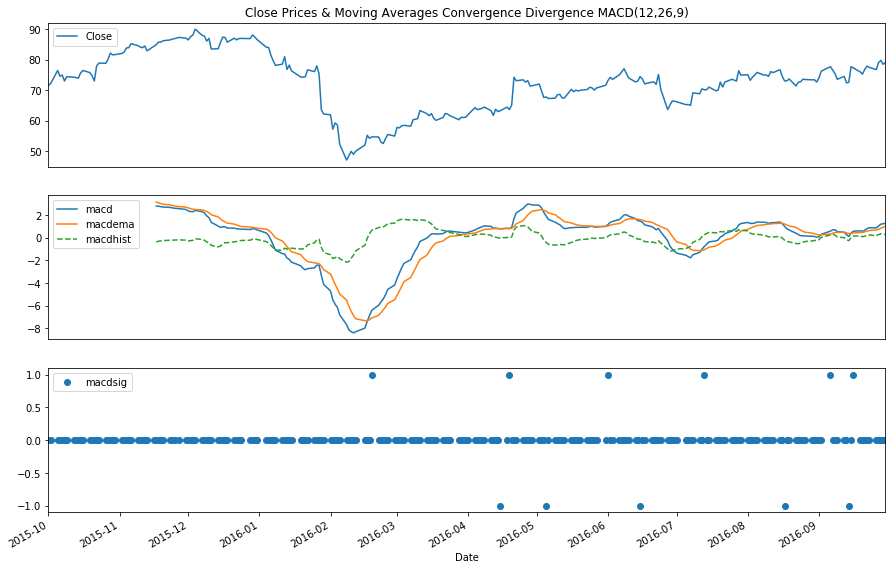

In [74]:
# TS Charts
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['macd', 'macdema'], ax=ax2)
stock.plot(y=['macdhist'], linestyle='--', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['macdsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

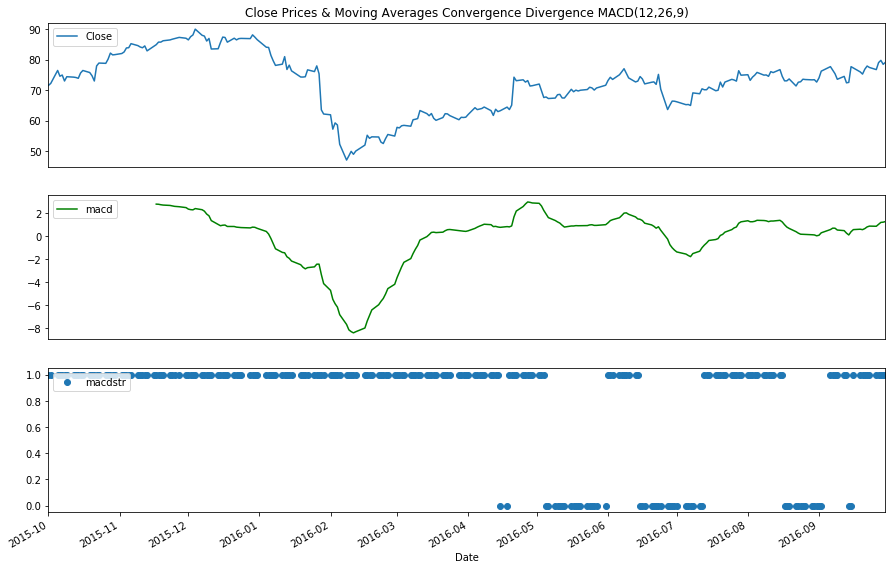

In [75]:
GenerateTradingStrategy('macdstr', 'macdsig')
TradingStrategyChart3('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)', 'Close', 'macd', 'macdstr')


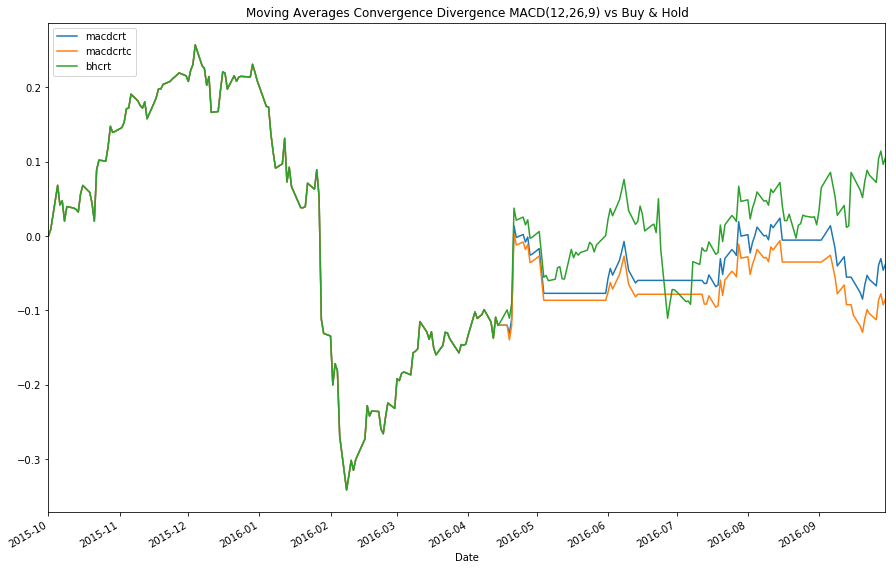

In [76]:
PriceCrossoverWithoutTradingCommisions('macddrt', 'macdstr')
PriceCrossoverWithTradingCommition('macdstr(-1)', 'macdstr', 'macddrtc', 'macdsig', 'macdtc')
CumulativeReturns('macdcrt', 'macdcrtc', 'bhcrt', 'macddrt', 'macddrtc', 'bhdrt', 'Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')


In [77]:
StrategiesPerformanceMetrics('macdcrt', 'macdcrtc', 'bhcrt', 'macddrt', 'macddrtc', 'bhdrt', 'MACD(12,26,9)', 'MACD(12,26,9)TC', 'B&H')


                                 0              1                2         3
0                                   MACD(12,26,9)  MACD(12,26,9)TC       B&H
1                Annualized Return     -0.0377434       -0.0847402  0.105756
2    Annualized Standard Deviation        0.38159          0.38176  0.423325
3  Annualized Sharpe Ratio (Rf=0%)     -0.0989108        -0.221972  0.249822


In [ ]:
# ROC

In [78]:
stock['roc(-1)'] = stock['roc'].shift(1)
stock['roc(-2)'] = stock['roc'].shift(2)

In [79]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['rocsig'] = 0
rocsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['roc(-2)'] < -10 and r[1]['roc(-1)'] > -10:
        rocsig = 1
    elif r[1]['roc(-2)'] < 10 and r[1]['roc(-1)'] > 10:
        rocsig = -1
    else:
        rocsig = 0
    stock.ix[i, 'rocsig'] = rocsig
    

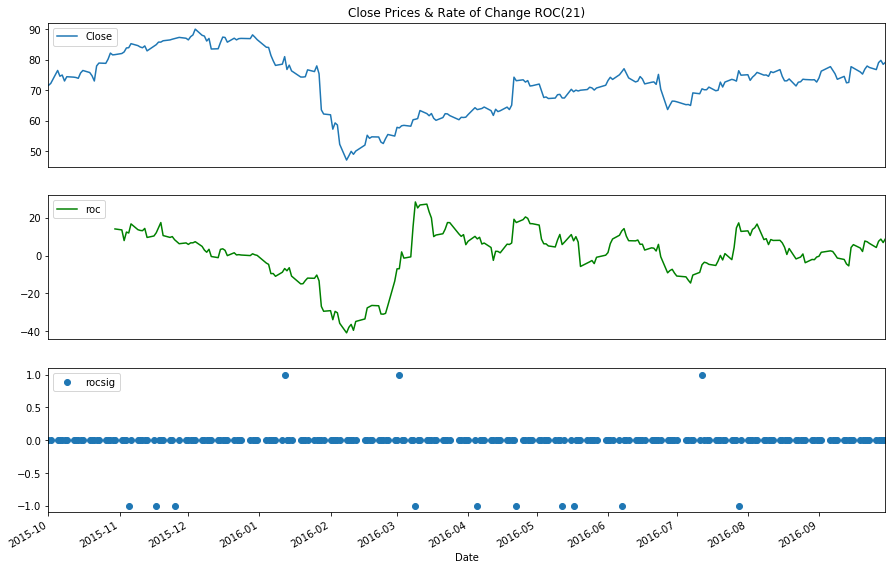

In [81]:
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['rocsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

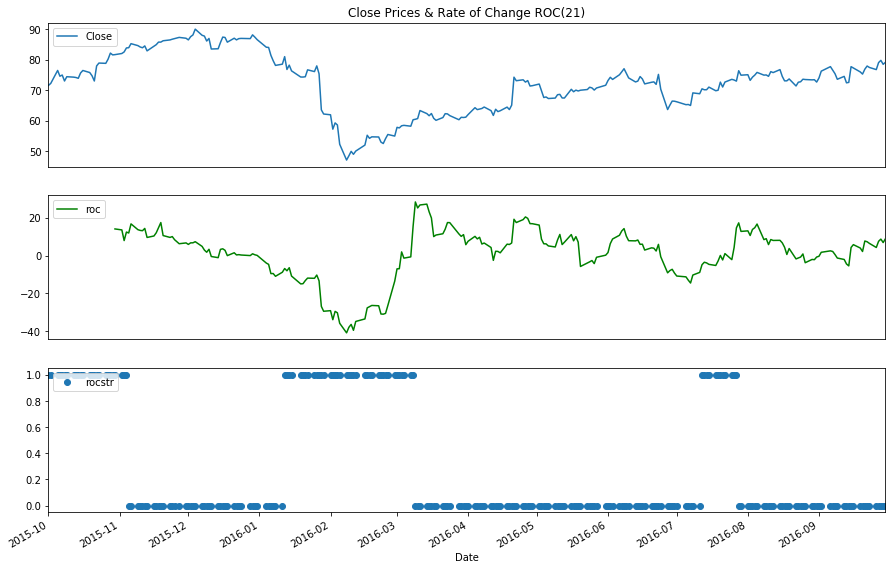

In [82]:
GenerateTradingStrategy('rocstr', 'rocsig')
TradingStrategyChart3('Close Prices & Rate of Change ROC(21)', 'Close', 'roc', 'rocstr')

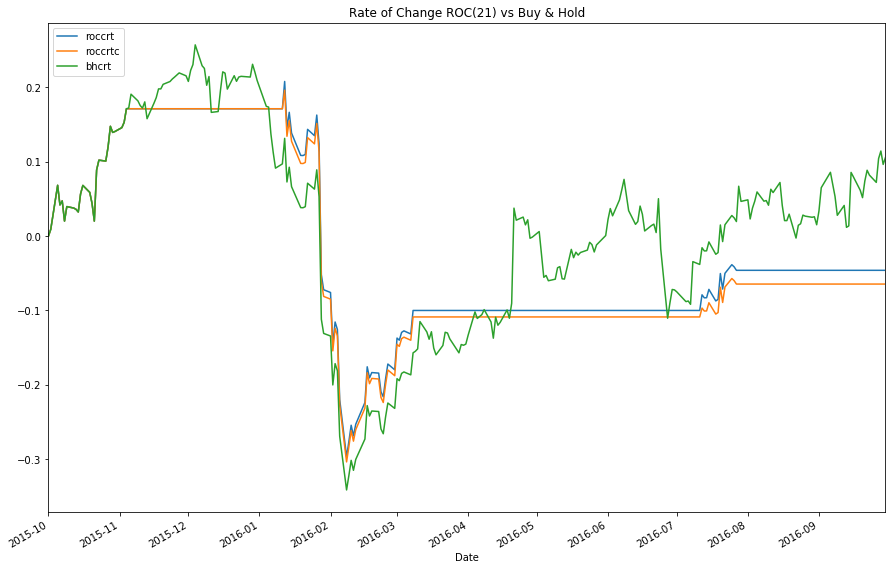

                                 0         1          2         3
0                                    ROC(21)  ROC(21)TC       B&H
1                Annualized Return   0.21785  -0.126081  0.105756
2    Annualized Standard Deviation  0.264934   0.271558  0.423325
3  Annualized Sharpe Ratio (Rf=0%)  0.822282  -0.464287  0.249822


In [84]:
PriceCrossoverWithoutTradingCommisions('rocdrt', 'rocstr')
PriceCrossoverWithTradingCommition('rocstr(-1)', 'rocstr', 'rocdrtc', 'rocsig', 'roctc')
CumulativeReturns('roccrt', 'roccrtc', 'bhcrt', 'rocdrt', 'rocdrtc', 'bhdrt', 'Rate of Change ROC(21) vs Buy & Hold')
StrategiesPerformanceMetrics('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'ROC(21)', 'ROC(21)TC', 'B&H')

In [ ]:
# Relative Strength Trading Signal

In [85]:
stock['rsi(-1)'] = stock['rsi'].shift(1)
stock['rsi(-2)'] = stock['rsi'].shift(2)

In [86]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['rsisig'] = 0
rsisig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['rsi(-2)'] < 30 and r[1]['rsi(-1)'] > 30:
        rsisig = 1
    elif r[1]['rsi(-2)'] < 70 and r[1]['rsi(-1)'] > 70:
        rsisig = -1
    else:
        rsisig = 0
    stock.ix[i, 'rsisig'] = rsisig

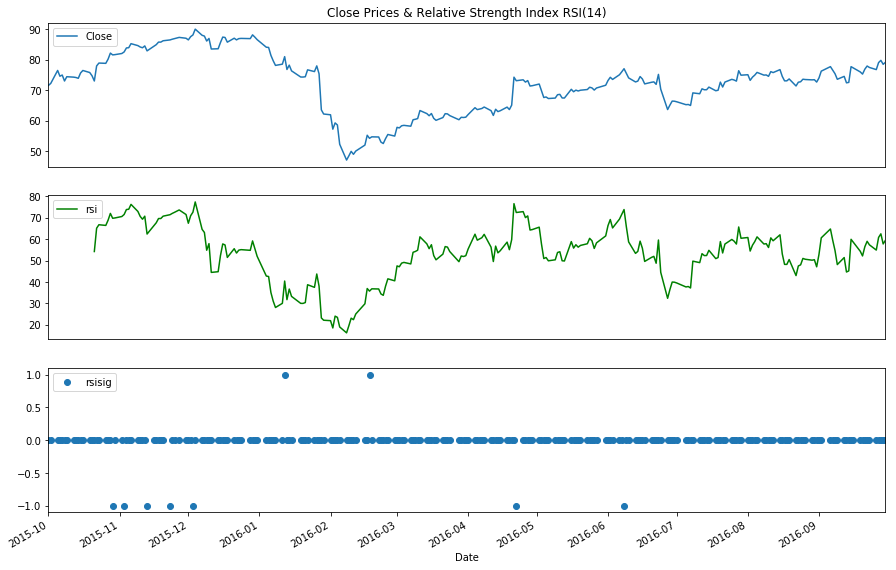

In [87]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['rsisig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

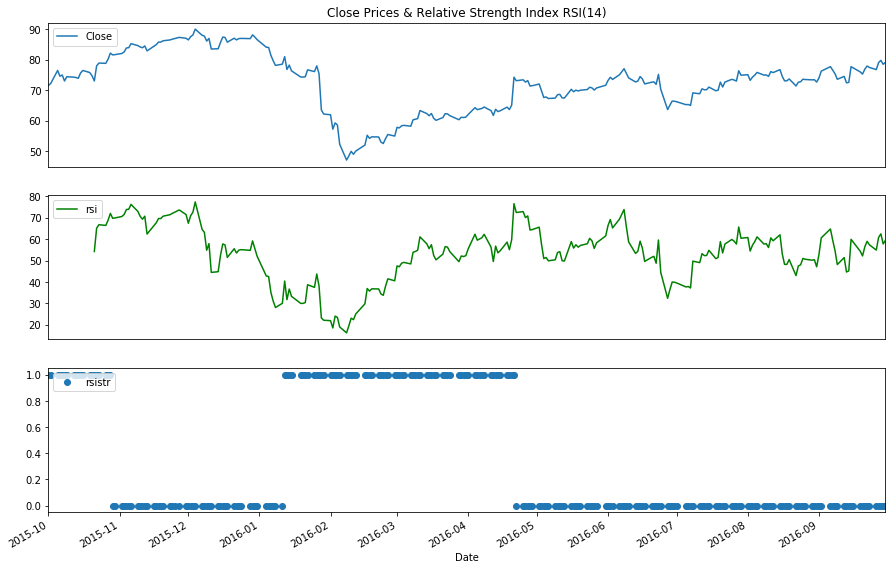

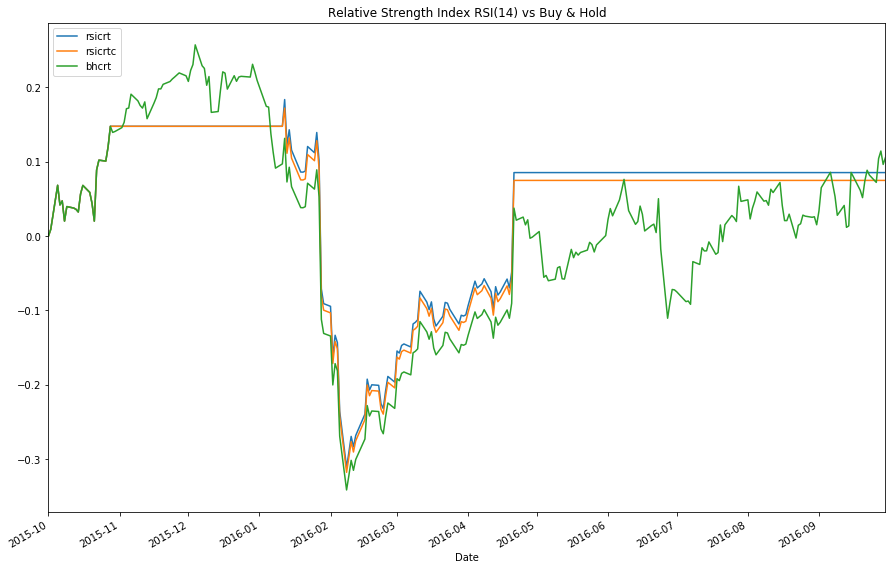

                                 0          1          2         3
0                                     RSI(14)  RSI(14)TC       B&H
1                Annualized Return  0.0854097  0.0748853  0.105756
2    Annualized Standard Deviation    0.34314   0.342391  0.423325
3  Annualized Sharpe Ratio (Rf=0%)   0.248906   0.218713  0.249822


In [88]:
GenerateTradingStrategy('rsistr', 'rsisig')
TradingStrategyChart3('Close Prices & Relative Strength Index RSI(14)', 'Close', 'rsi', 'rsistr')


PriceCrossoverWithoutTradingCommisions('rsidrt', 'rsistr')
PriceCrossoverWithTradingCommition('rsistr(-1)', 'rsistr', 'rsidrtc', 'rsisig', 'rsitc')
CumulativeReturns('rsicrt', 'rsicrtc', 'bhcrt', 'rsidrt', 'rsidrtc', 'bhdrt', 'Relative Strength Index RSI(14) vs Buy & Hold')

StrategiesPerformanceMetrics('rsicrt', 'rsicrtc', 'bhcrt', 'rsidrt', 'rsidrtc', 'bhdrt', 'RSI(14)', 'RSI(14)TC', 'B&H')


In [ ]:
# Stochastic Oscillator Trading Signal

In [89]:
stock['slowd(-1)'] = stock['slowd'].shift(1)
stock['slowd(-2)'] = stock['slowd'].shift(2)

In [90]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['stosig'] = 0
stosig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['slowd(-2)'] < 20 and r[1]['slowd(-1)'] > 20:
        stosig = 1
    elif r[1]['slowd(-2)'] < 80 and r[1]['slowd(-1)'] > 80:
        stosig = -1
    else:
        stosig = 0
    stock.ix[i, 'stosig'] = stosig
    

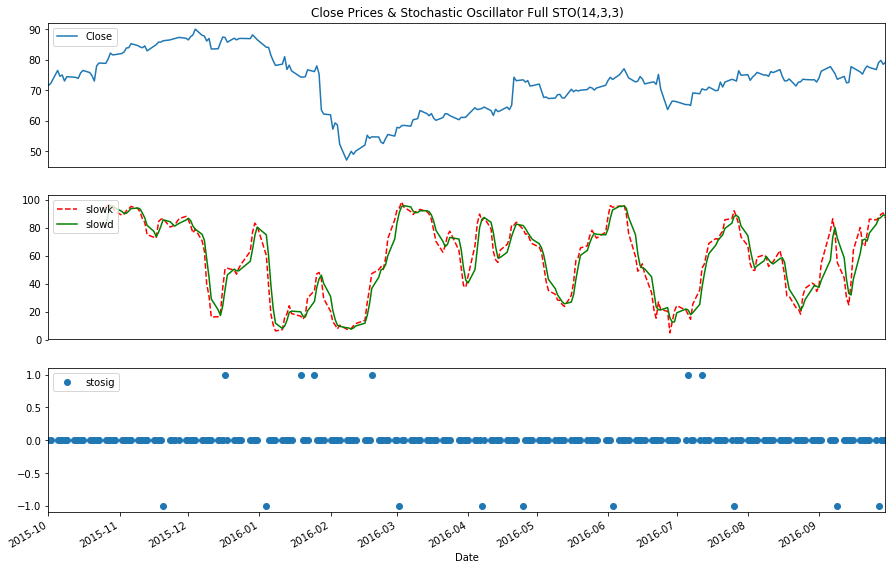

In [91]:
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
stock.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['stosig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

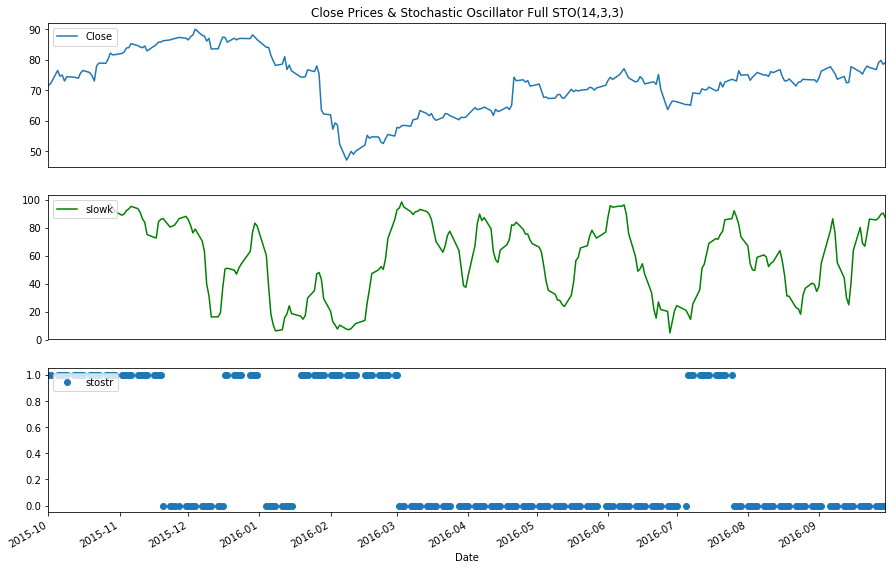

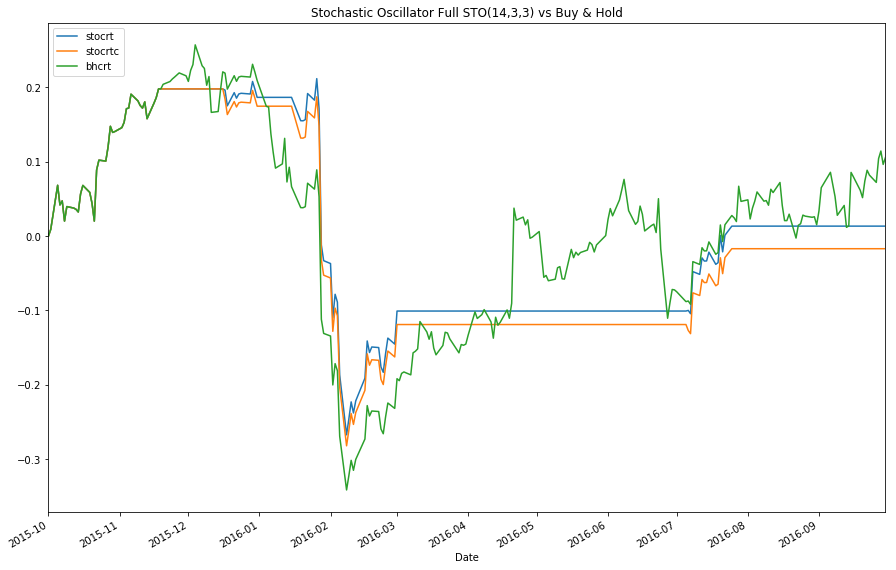

                                 0            1              2         3
0                                   STO(14,3,3)  STO(14,3,3)TC       B&H
1                Annualized Return    0.0133915     -0.0169817  0.105756
2    Annualized Standard Deviation      0.30459       0.305976  0.423325
3  Annualized Sharpe Ratio (Rf=0%)    0.0439657     -0.0555003  0.249822


In [92]:
GenerateTradingStrategy('stostr', 'stosig')
TradingStrategyChart3('Close Prices & Stochastic Oscillator Full STO(14,3,3)', 'Close', 'slowk', 'stostr')


PriceCrossoverWithoutTradingCommisions('stodrt', 'stostr')
PriceCrossoverWithTradingCommition('stostr(-1)', 'stostr', 'stodrtc', 'stosig', 'stotc')
CumulativeReturns('stocrt', 'stocrtc', 'bhcrt', 'stodrt', 'stodrtc', 'bhdrt', 'Stochastic Oscillator Full STO(14,3,3) vs Buy & Hold')

StrategiesPerformanceMetrics('stocrt', 'stocrtc', 'bhcrt', 'stodrt', 'stodrtc', 'bhdrt', 'STO(14,3,3)', 'STO(14,3,3)TC', 'B&H')


In [ ]:
# William %R Trading Signal

In [93]:
stock['wpr(-1)'] = stock['wpr'].shift(1)
stock['wpr(-2)'] = stock['wpr'].shift(2)

In [94]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['wprsig'] = 0
wprsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['wpr(-2)'] < -80 and r[1]['wpr(-1)'] > -80:
        wprsig = 1
    elif r[1]['wpr(-2)'] < -20 and r[1]['wpr(-1)'] > -20:
        wprsig = -1
    else:
        wprsig = 0
    stock.ix[i, 'wprsig'] = wprsig

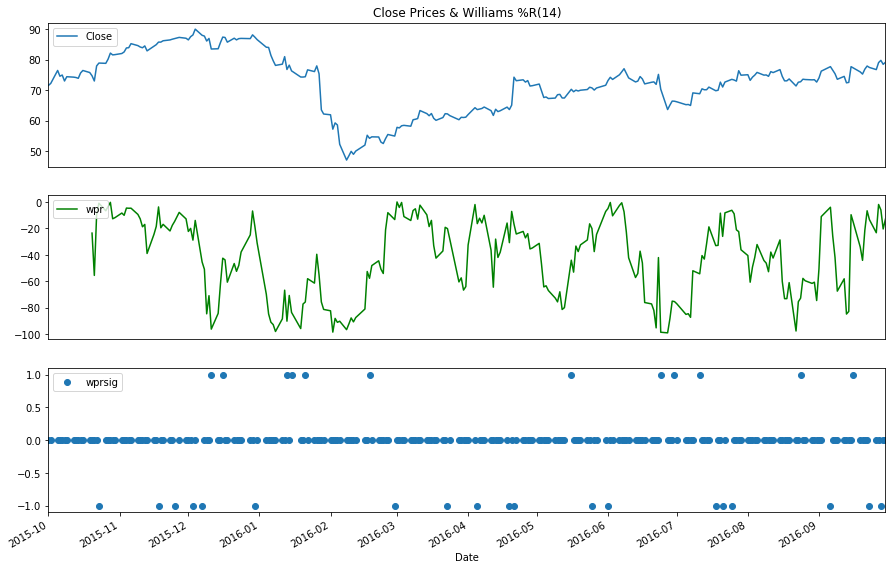

In [95]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['wprsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

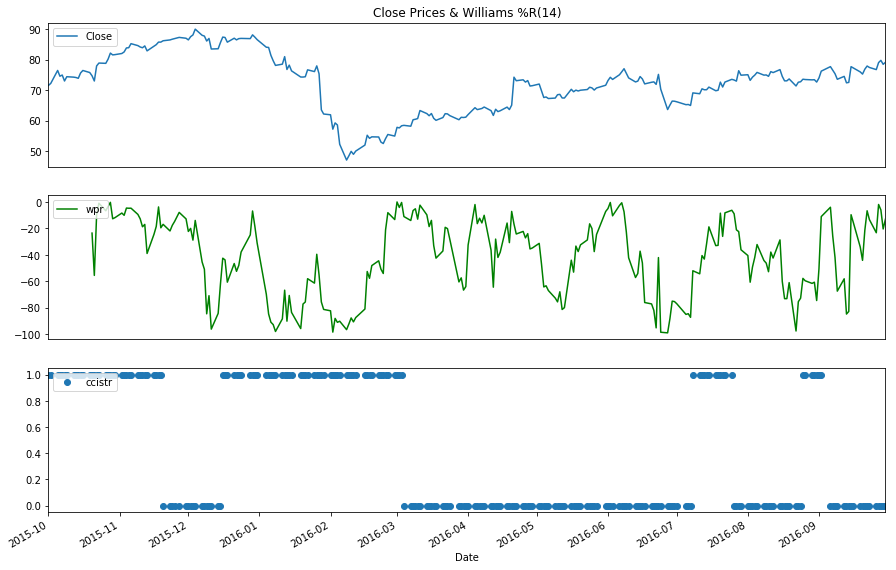

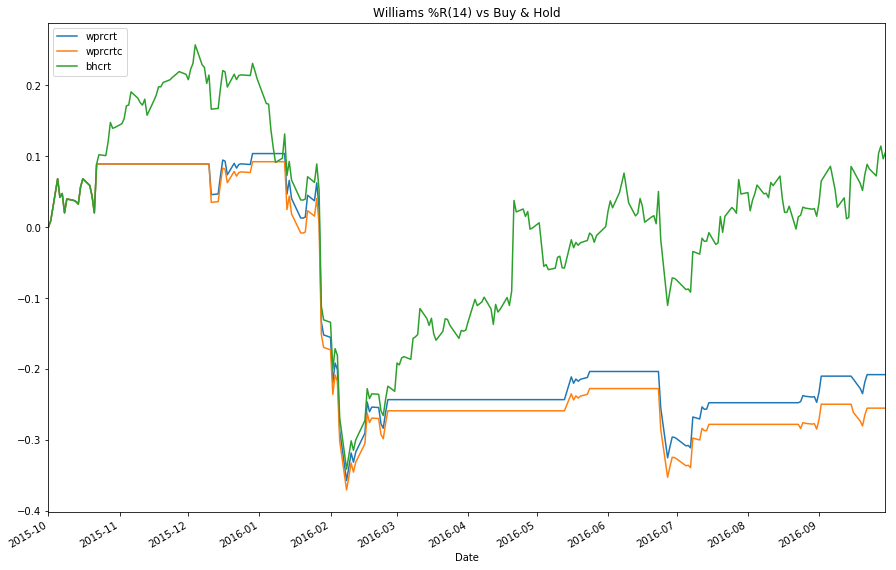

                                 0         1         2         3
0                                     %R(14)  %R(14)TC       B&H
1                Annualized Return -0.208202 -0.255499  0.105756
2    Annualized Standard Deviation  0.330554  0.334808  0.423325
3  Annualized Sharpe Ratio (Rf=0%) -0.629857  -0.76312  0.249822


In [96]:
GenerateTradingStrategy('wprstr', 'wprsig')
TradingStrategyChart3('Close Prices & Williams %R(14)', 'Close', 'wpr', 'ccistr')


PriceCrossoverWithoutTradingCommisions('wprdrt', 'wprstr')
PriceCrossoverWithTradingCommition('wprstr(-1)', 'wprstr', 'wprdrtc', 'wprsig', 'wprtc')
CumulativeReturns('wprcrt', 'wprcrtc', 'bhcrt', 'wprdrt', 'wprdrtc', 'bhdrt', 'Williams %R(14) vs Buy & Hold')

StrategiesPerformanceMetrics('wprcrt', 'wprcrtc', 'bhcrt', 'wprdrt', 'wprdrtc', 'bhdrt', '%R(14)', '%R(14)TC', 'B&H')


In [97]:
# SMA(5) and CCI(20,0.015)

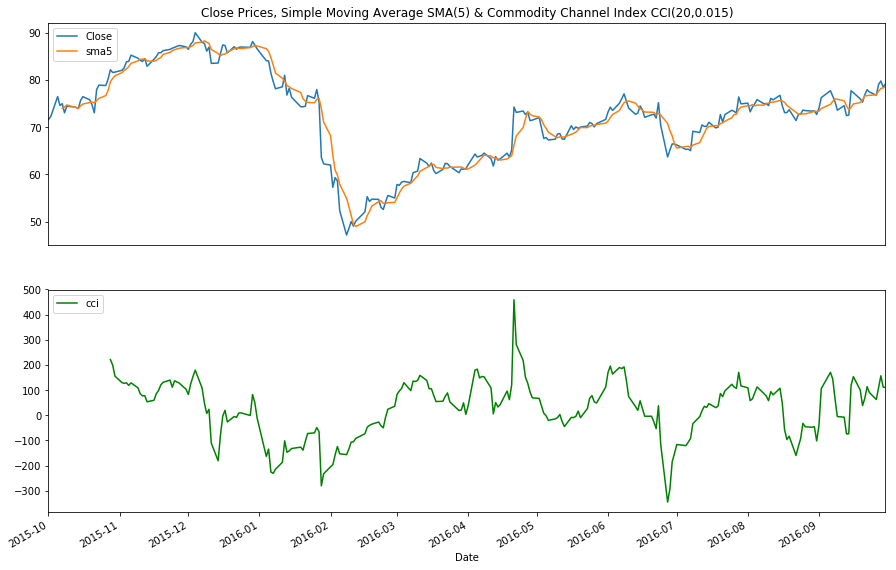

In [98]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [99]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['ccismasig'] = 0
ccismasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['cci(-1)'] < -100:
        ccismasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['cci(-1)'] > 100:
        ccismasig = -1
    else:
        ccismasig = 0
    stock.ix[i, 'ccismasig'] = ccismasig
    

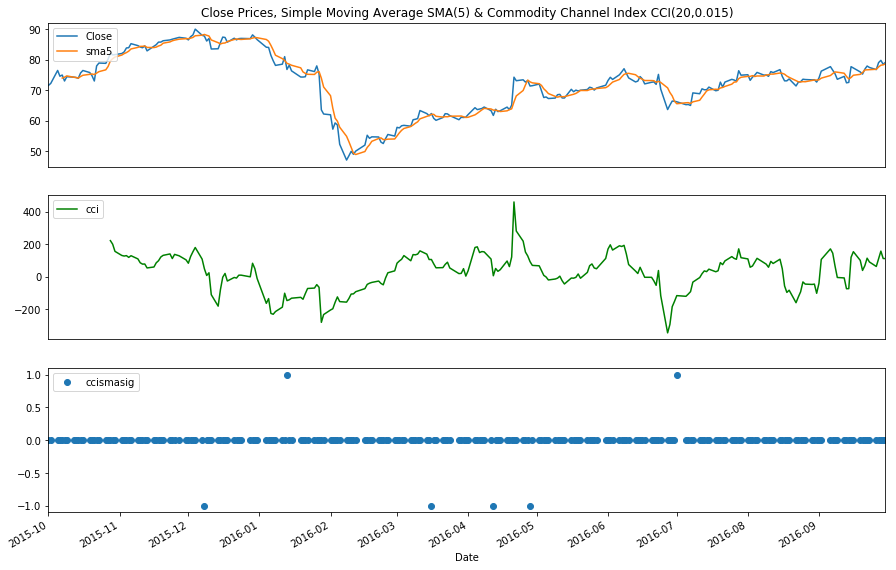

In [100]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['ccismasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

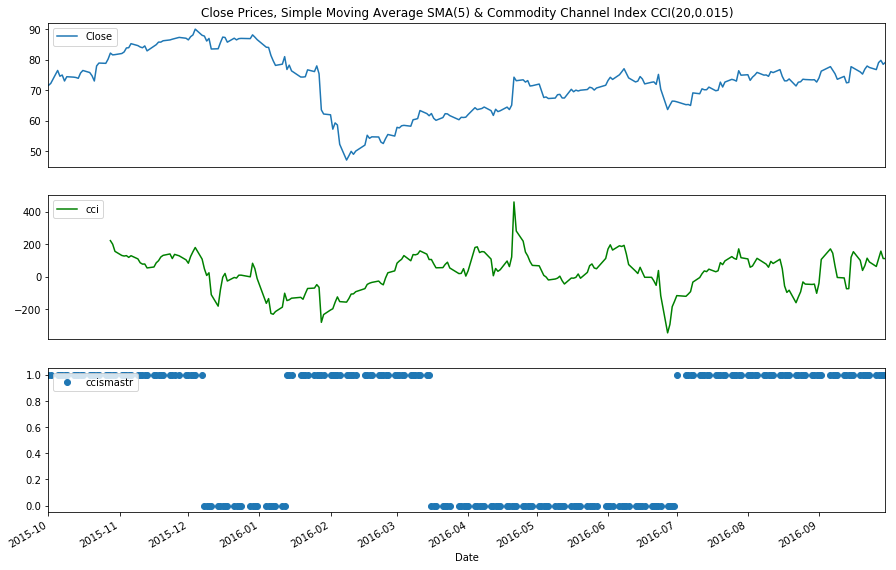

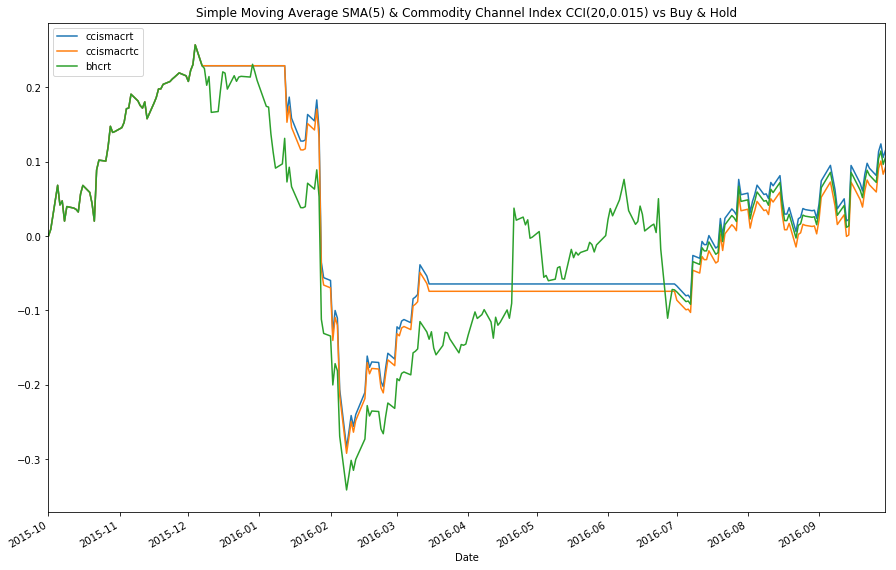

                                 0              1                2         3
0                                   CCI(20,0.015)  CCI(20,0.015)TC       B&H
1                Annualized Return       0.115262        0.0924325  0.105756
2    Annualized Standard Deviation        0.34468         0.346582  0.423325
3  Annualized Sharpe Ratio (Rf=0%)       0.334402         0.266697  0.249822


In [102]:
GenerateTradingStrategy('ccismastr', 'ccismasig')
TradingStrategyChart3('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)', 'Close', 'cci', 'ccismastr')


PriceCrossoverWithoutTradingCommisions('ccismadrt', 'ccismastr')
PriceCrossoverWithTradingCommition('ccismastr(-1)', 'ccismastr', 'ccismadrtc', 'ccismasig', 'ccismatc')
CumulativeReturns('ccismacrt', 'ccismacrtc', 'bhcrt', 'ccismadrt', 'ccismadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015) vs Buy & Hold')

StrategiesPerformanceMetrics('ccismacrt', 'ccismacrtc', 'bhcrt', 'ccismadrt', 'ccismadrtc', 'bhdrt', 'CCI(20,0.015)', 'CCI(20,0.015)TC', 'B&H')


In [103]:
# SMA(5) and ROC(21)

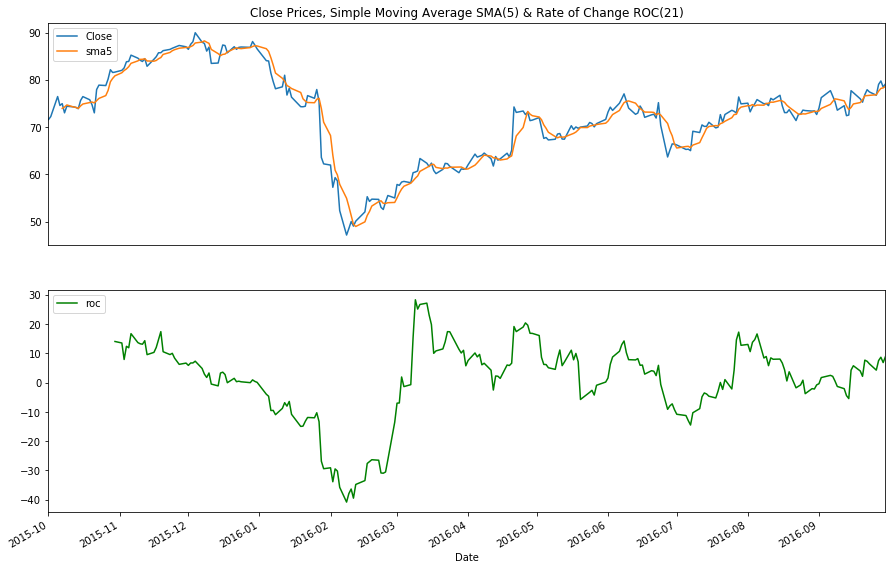

In [104]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [105]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['rocsmasig'] = 0
rocsmasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['roc(-1)'] < -10:
        rocsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['roc(-1)'] > 10:
        rocsmasig = -1
    else:
        rocsmasig = 0
    stock.ix[i, 'rocsmasig'] = rocsmasig

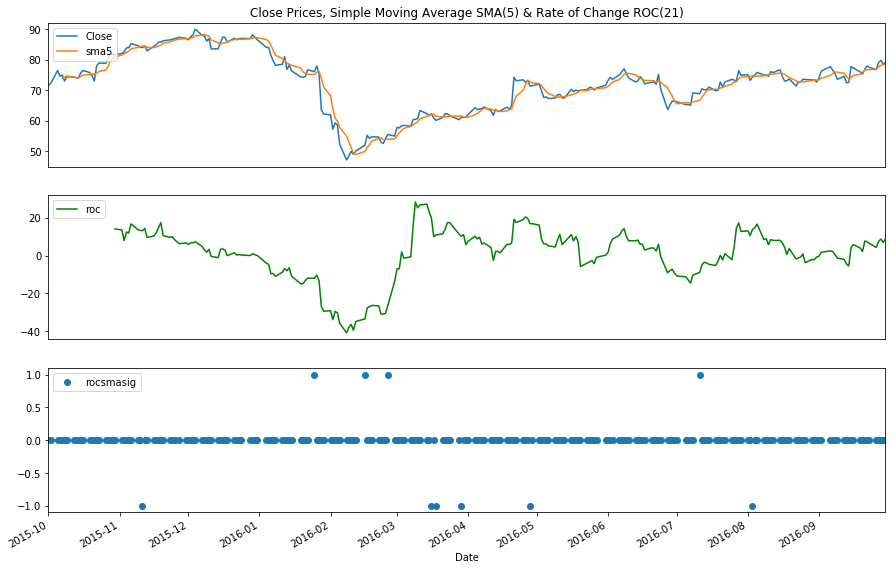

In [106]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['rocsmasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

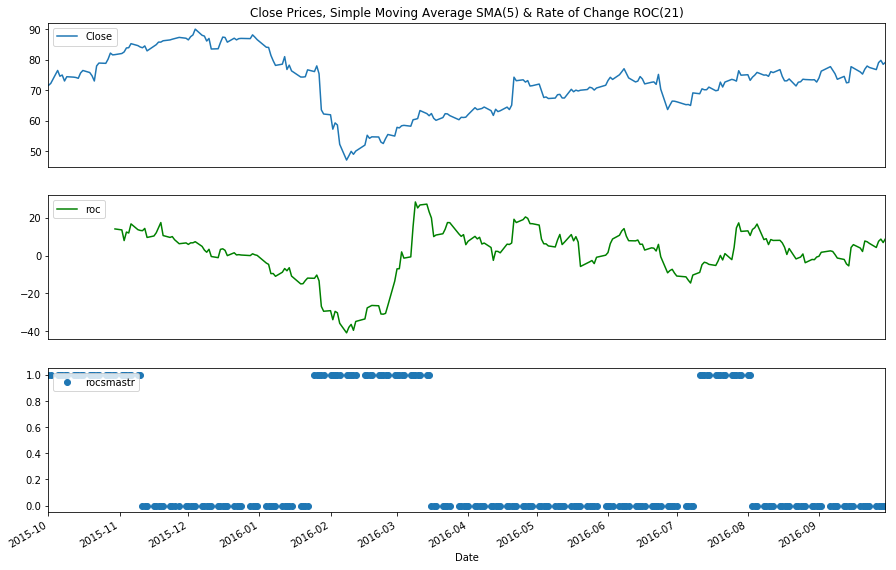

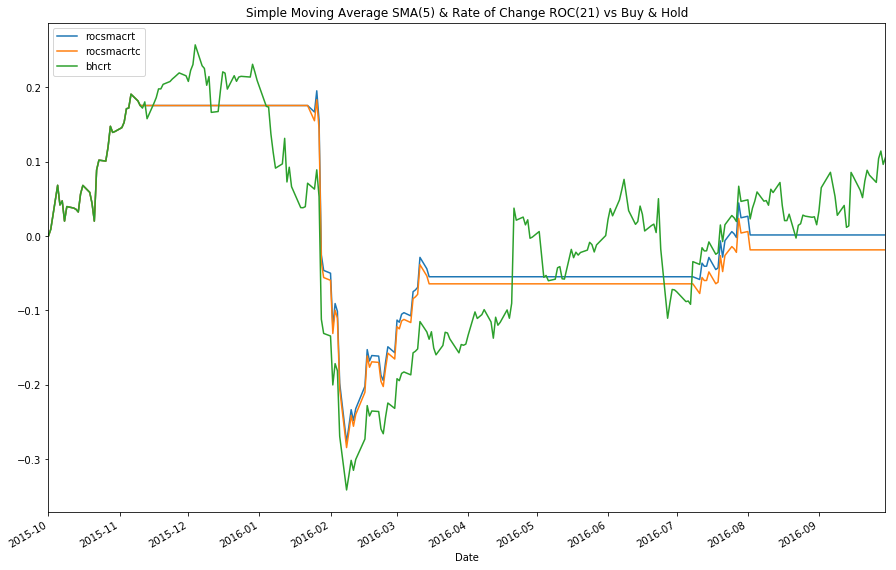

                                 0           1          2         3
0                                          ---      ---TC       B&H
1                Annualized Return  0.00151019  -0.018533  0.105756
2    Annualized Standard Deviation    0.303717   0.304426  0.423325
3  Annualized Sharpe Ratio (Rf=0%)  0.00497235 -0.0608785  0.249822


In [108]:
GenerateTradingStrategy('rocsmastr', 'rocsmasig')
TradingStrategyChart3('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)', 'Close', 'roc', 'rocsmastr')


PriceCrossoverWithoutTradingCommisions('rocsmadrt', 'rocsmastr')
PriceCrossoverWithTradingCommition('rocsmastr(-1)', 'rocsmastr', 'rocsmadrtc', 'rocsmasig', 'rocsmatc')
CumulativeReturns('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & Rate of Change ROC(21) vs Buy & Hold')

StrategiesPerformanceMetrics('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', '---', '---TC', 'B&H')


In [109]:
# SMA(5) and RSI(14)

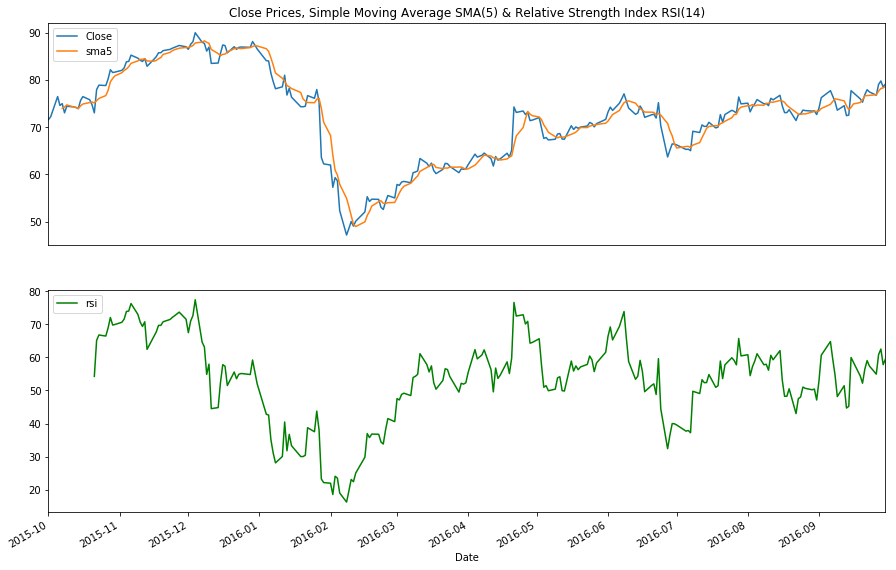

In [110]:
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

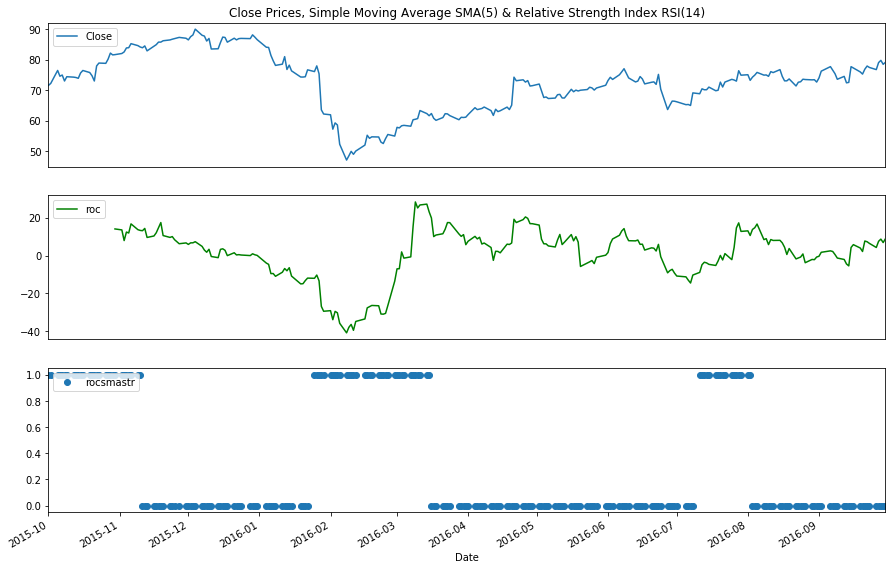

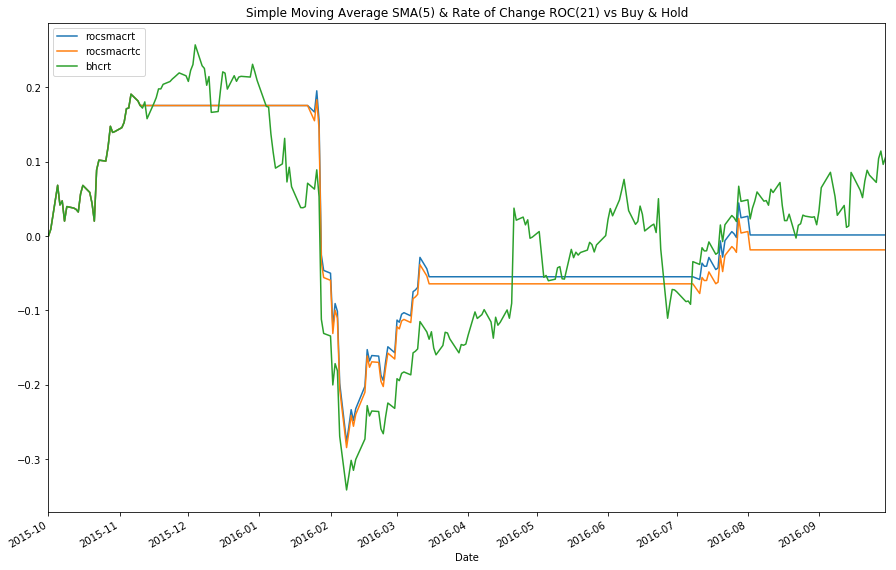

                                 0           1          2         3
0                                          ---      ---TC       B&H
1                Annualized Return  0.00151019  -0.018533  0.105756
2    Annualized Standard Deviation    0.303717   0.304426  0.423325
3  Annualized Sharpe Ratio (Rf=0%)  0.00497235 -0.0608785  0.249822


In [111]:
GenerateTradingStrategy('rocsmastr', 'rocsmasig')
TradingStrategyChart3('Close Prices, Simple Moving Average SMA(5) & Relative Strength Index RSI(14)', 'Close', 'roc', 'rocsmastr')


PriceCrossoverWithoutTradingCommisions('rocsmadrt', 'rocsmastr')
PriceCrossoverWithTradingCommition('rocsmastr(-1)', 'rocsmastr', 'rocsmadrtc', 'rocsmasig', 'rocsmatc')
CumulativeReturns('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & Rate of Change ROC(21) vs Buy & Hold')

StrategiesPerformanceMetrics('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', '---', '---TC', 'B&H')


In [112]:
# SMA(5) and STO(14,3,3)

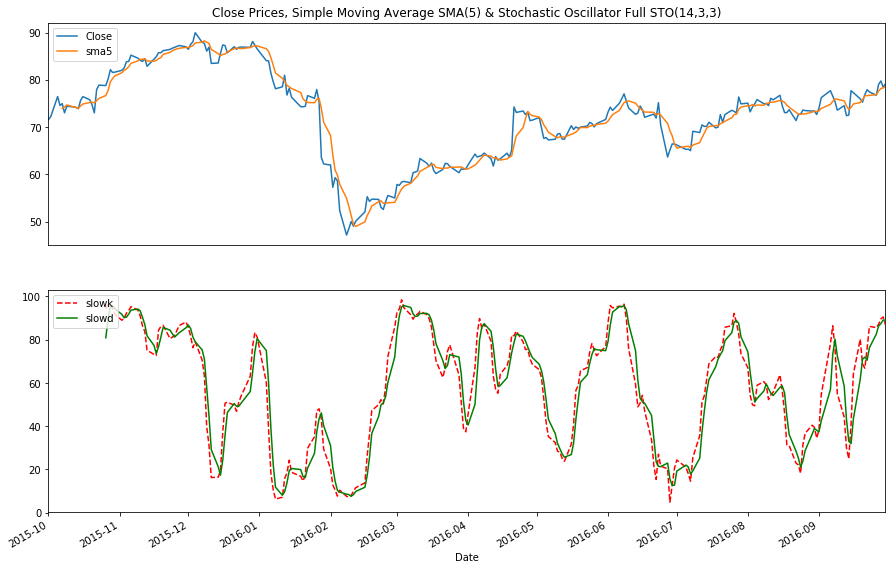

In [113]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
stock.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [114]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['stosmasig'] = 0
stosmasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['slowd(-1)'] < 20:
        stosmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['slowd(-1)'] > 80:
        stosmasig = -1
    else:
        stosmasig = 0
    stock.ix[i, 'stosmasig'] = stosmasig
    

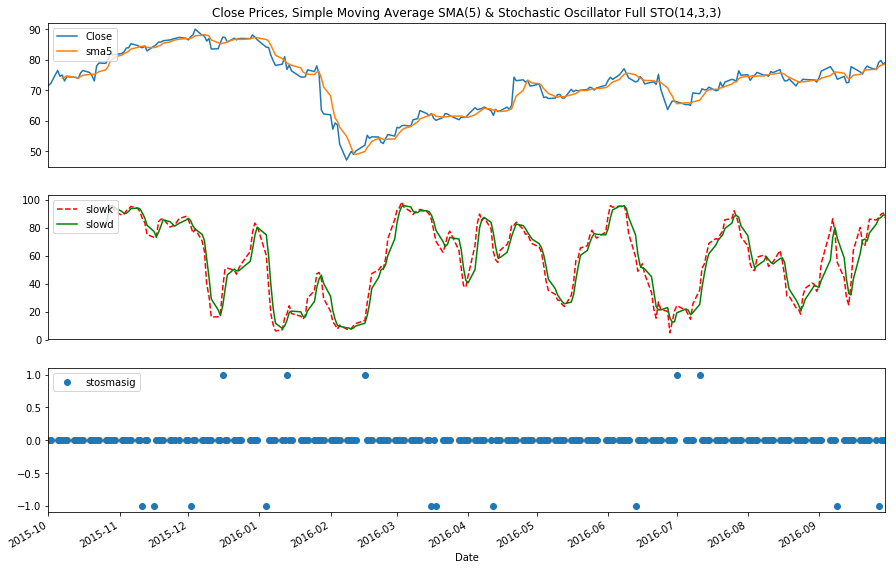

In [115]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
stock.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['stosmasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# SMA(5) and Williams %R(14)

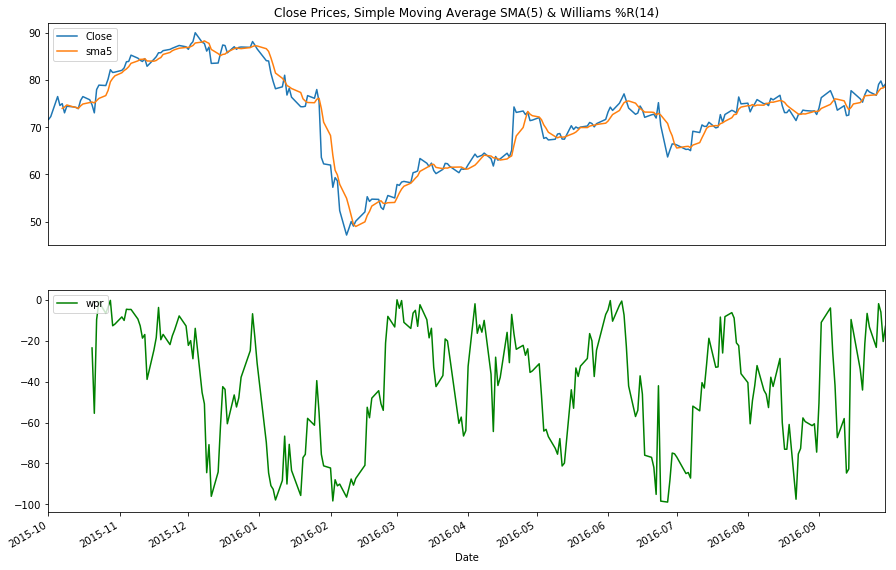

In [116]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
stock.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [117]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['wprsmasig'] = 0
wprsmasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['wpr(-1)'] < -80:
        wprsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['wpr(-1)'] > -20:
        wprsmasig = -1
    else:
        wprsmasig = 0
    stock.ix[i, 'wprsmasig'] = wprsmasig    

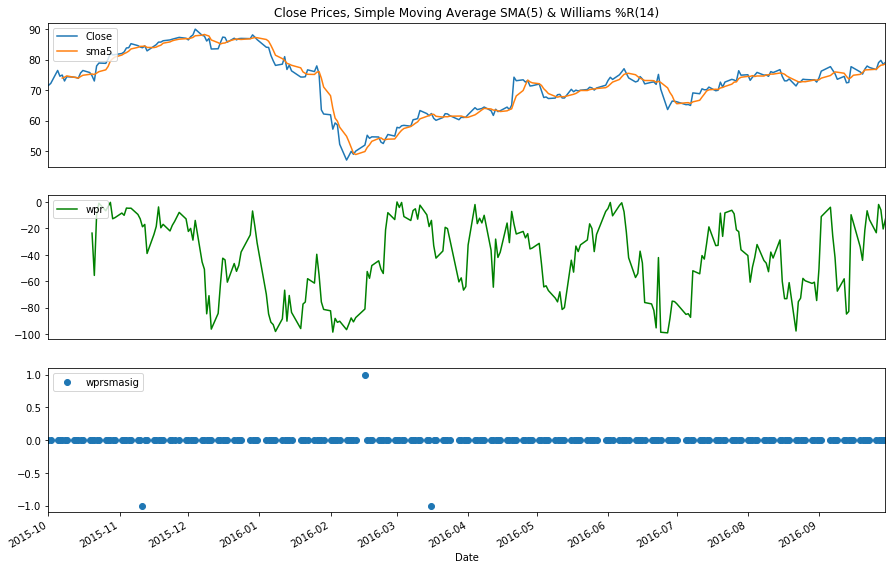

In [118]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
stock.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
stock.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
stock.plot(y=['wprsmasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()